[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Training YOLOv8 Instance Segmentation on MuonDataset


In [ ]:
!nvidia-smi

Mon Mar 13 15:07:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.9/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Import Dataset from Roboflow
MuonDataset -> latest_version

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="gPegshQET213VicxEQVn")
project = rf.workspace("tesis-tbpvf").project("muondataset")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.4 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.53, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to MuonDataset-1 in yolov8:: 100%|██████████| 886/886 [00:00<00:00, 1644.48it/s]


##Modelo YOLOV8N-SEG

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 name='epoch100_yolov8n'

/content
100% 6.73M/6.73M [00:00<00:00, 75.5MB/s]
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/datasets/MuonDataset-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=epoch100_yolov8n, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, 

/content


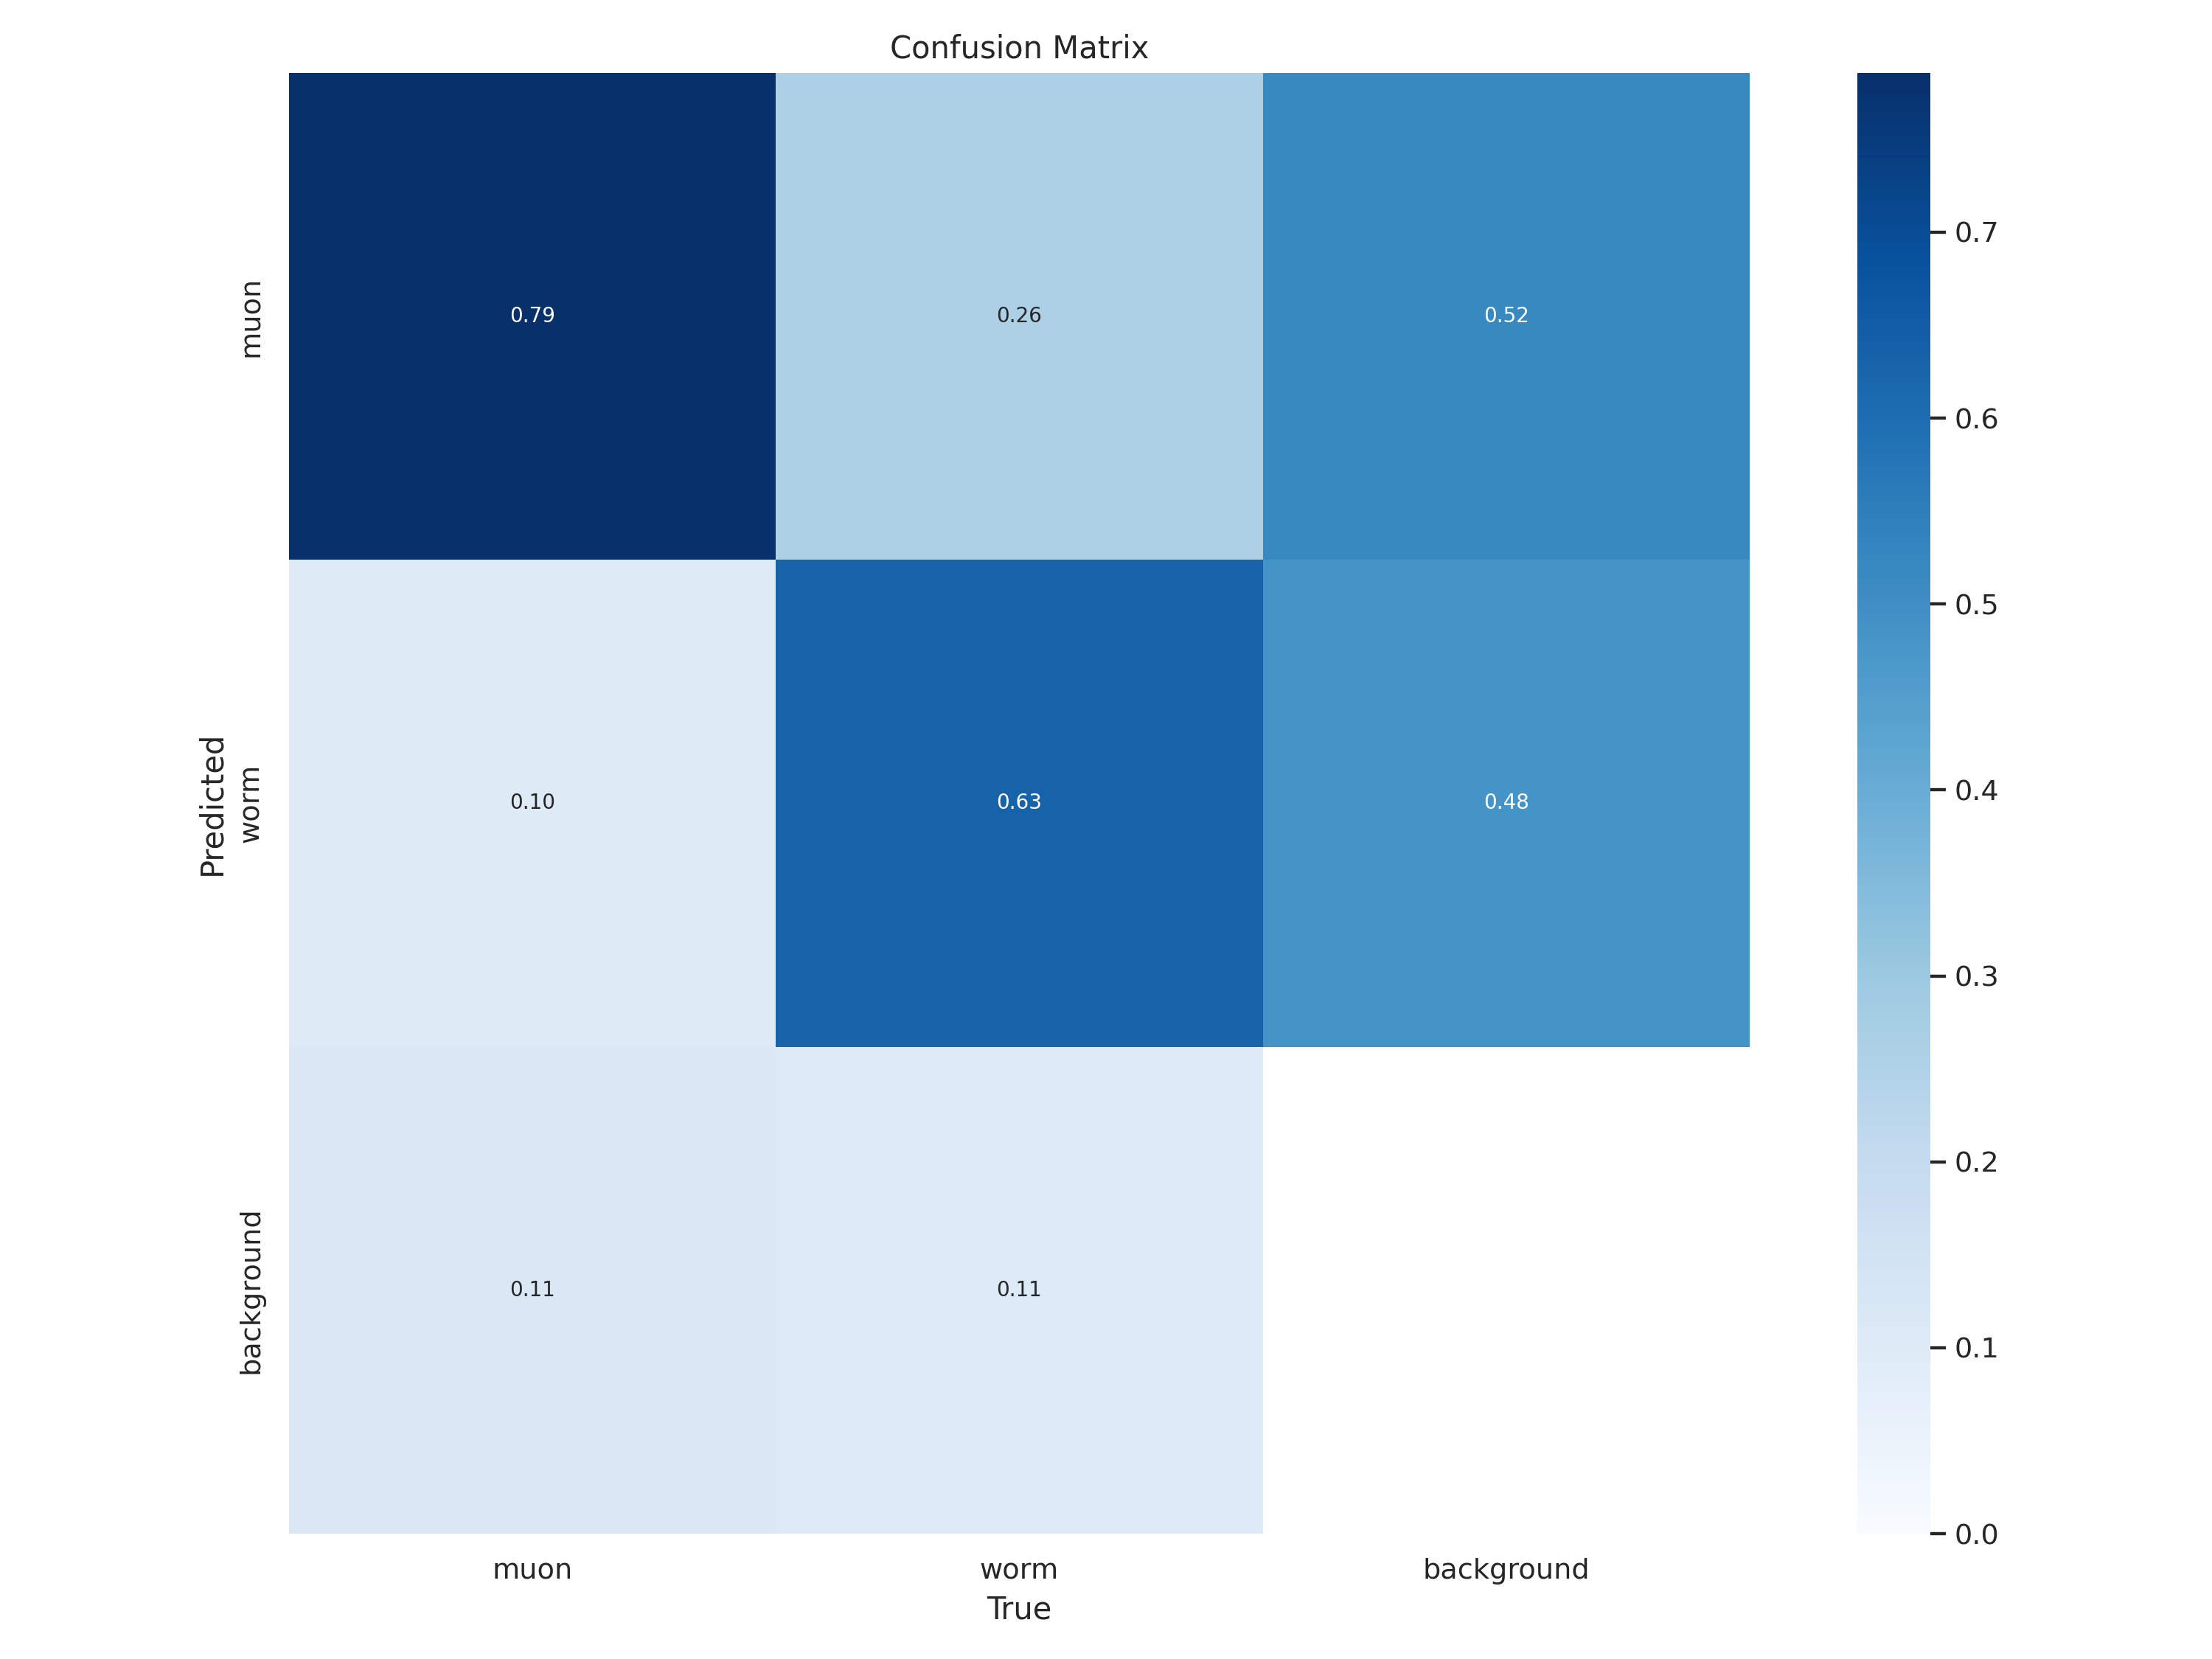

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8n/confusion_matrix.png', width=700)

/content


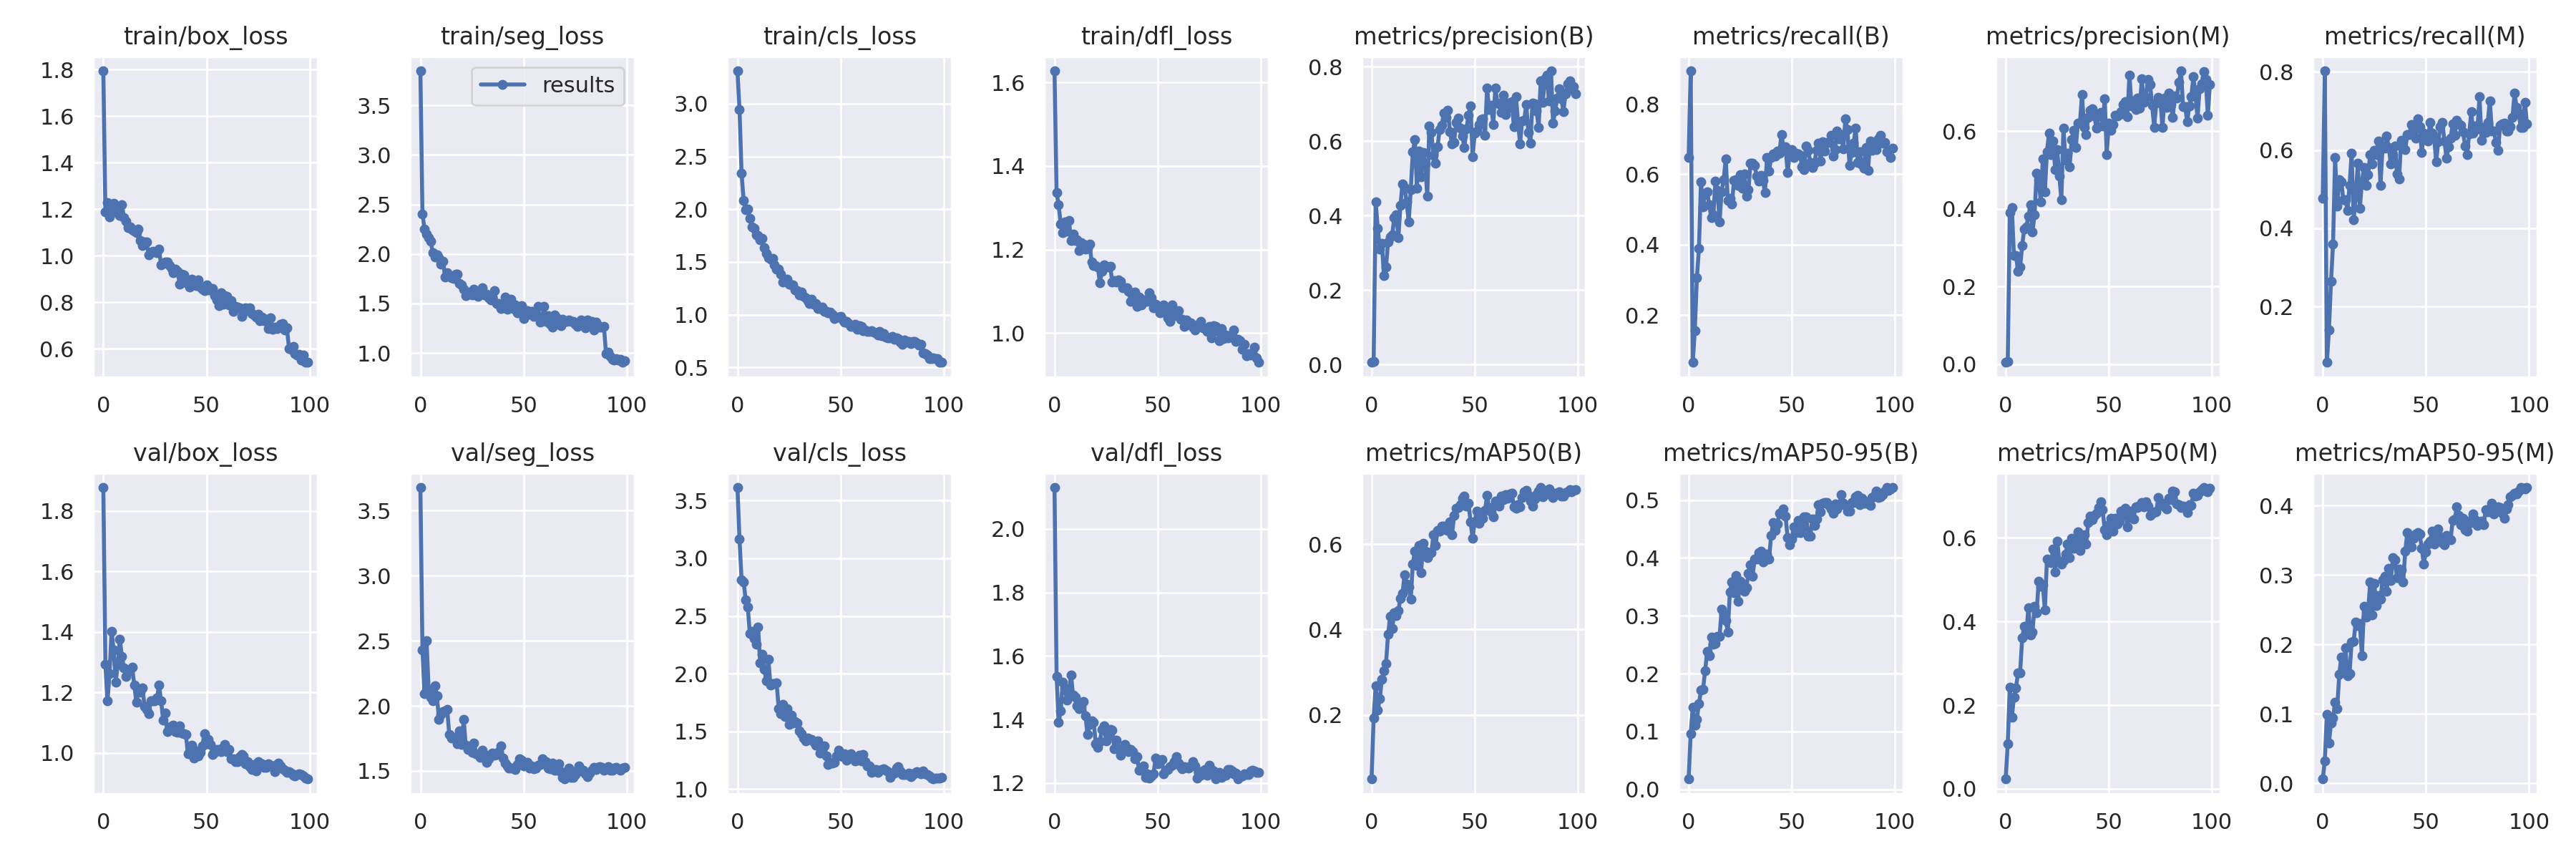

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8n/results.png', width=600)

/content


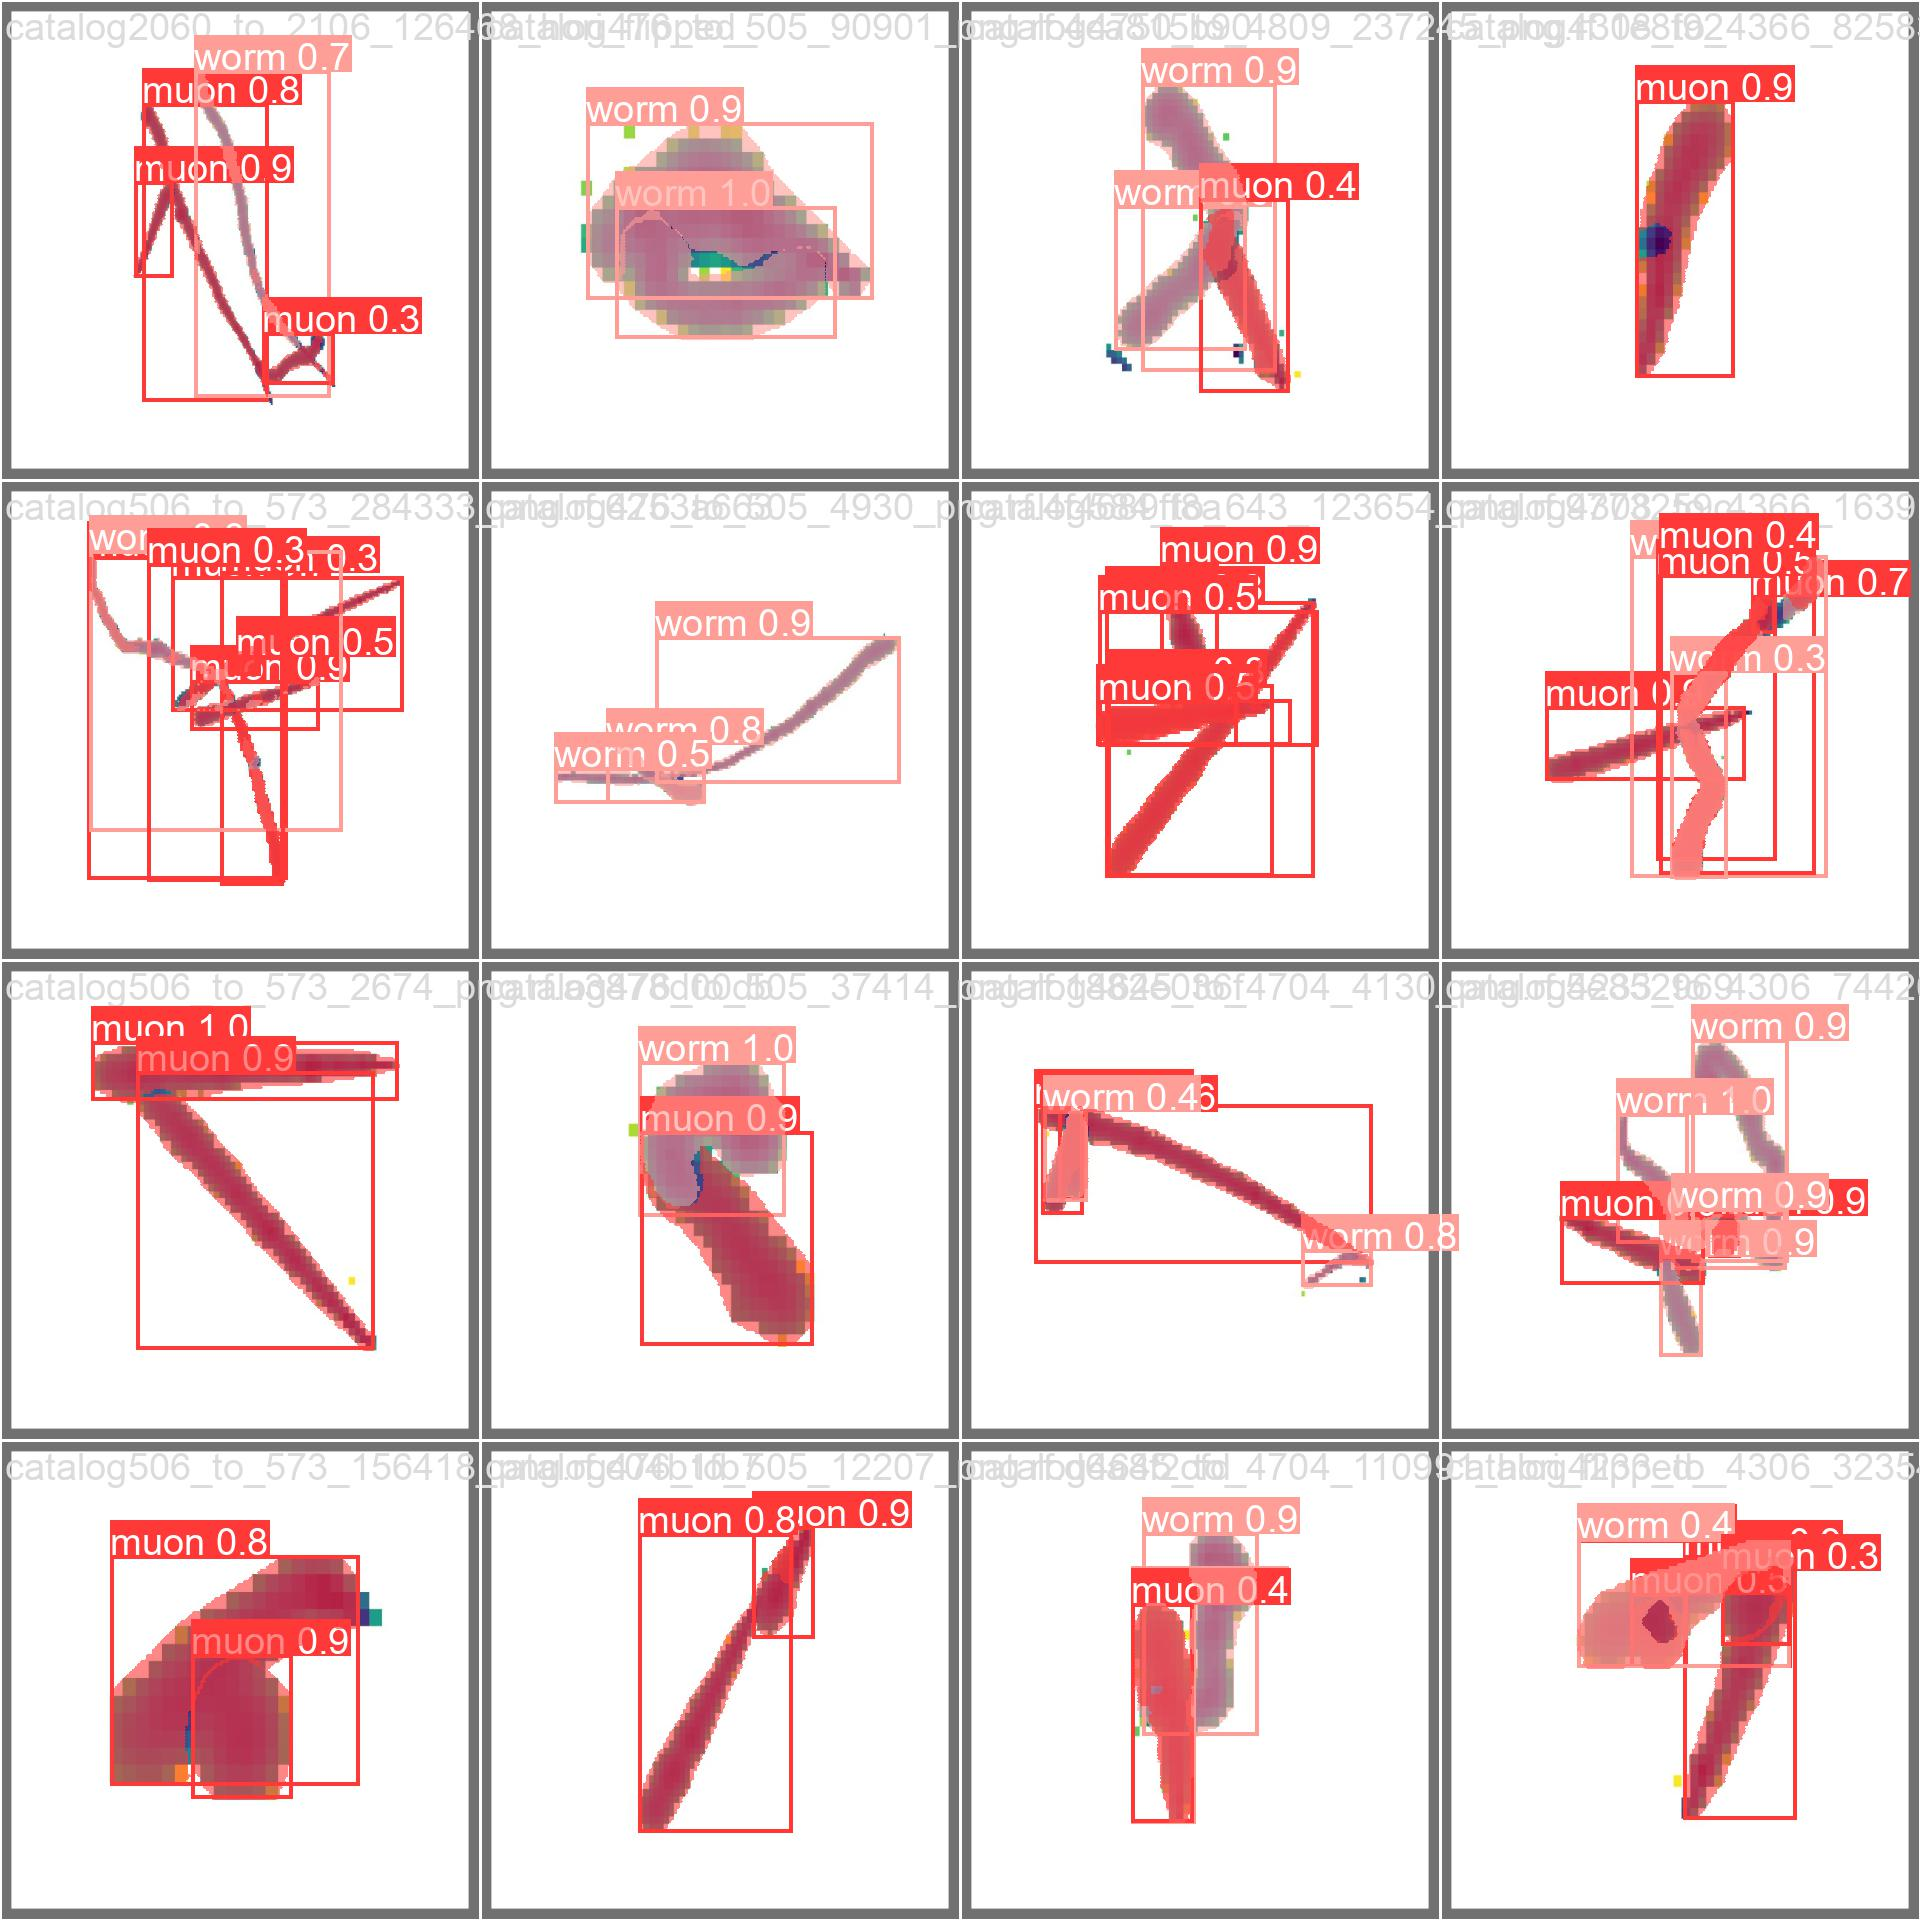

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8n/val_batch0_pred.jpg', width=600)

## Validate YOLOV8N-SEG

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/epoch100_yolov8n/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/datasets/MuonDataset-1/valid/labels.cache... 88 images, 0 backgrounds, 0 corrupt: 100% 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:07<00:00,  1.29s/it]
                   all         88        232      0.762      0.665      0.728      0.521      0.754      0.657      0.721      0.425
                  muon         88        140      0.774      0.786      0.802      0.609       0.76      0.771      0.771      0.491
                  worm         88         92      0.749      0.543      0.655      0.433      0.749      0.543       0.67      0.359
Speed: 6.1ms preprocess, 9.7ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/segment/val2


##Predict YOLOV8N-SEG

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/epoch100_yolov8n/weights/best.pt conf=0.25 source={dataset.location}/test/images name='test_yolov8n' save=True

/content
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs

image 1/43 /content/datasets/MuonDataset-1/test/images/catalog2060_to_2106_143603_png.rf.1e8e0b927baaeaef7c2b5613dbc09f3f.jpg: 640x640 1 muon, 1 worm, 26.7ms
image 2/43 /content/datasets/MuonDataset-1/test/images/catalog2060_to_2106_175983_png.rf.066cb43c40bd7f1a3ff37b7788e5c6f0.jpg: 640x640 2 muons, 1 worm, 12.8ms
image 3/43 /content/datasets/MuonDataset-1/test/images/catalog2110_to_2171_157446_png.rf.91b56c3390422913c596e9a8f0480ce8.jpg: 640x640 2 muons, 1 worm, 15.3ms
image 4/43 /content/datasets/MuonDataset-1/test/images/catalog2110_to_2171_158279_png.rf.a36d137dcc14e93f4b992f5405511ea4.jpg: 640x640 3 muons, 1 worm, 16.2ms
image 5/43 /content/datasets/MuonDataset-1/test/images/catalog2304_to_2353_110927_png.rf.3645e63f71abff1e142be208835621ba.jpg: 640x640 2 muons, 1 worm, 12.4ms
image 6/43 /content/dat

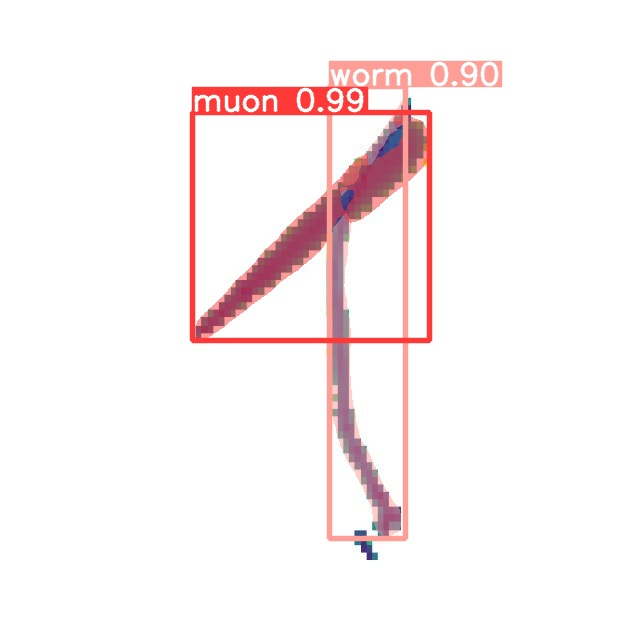

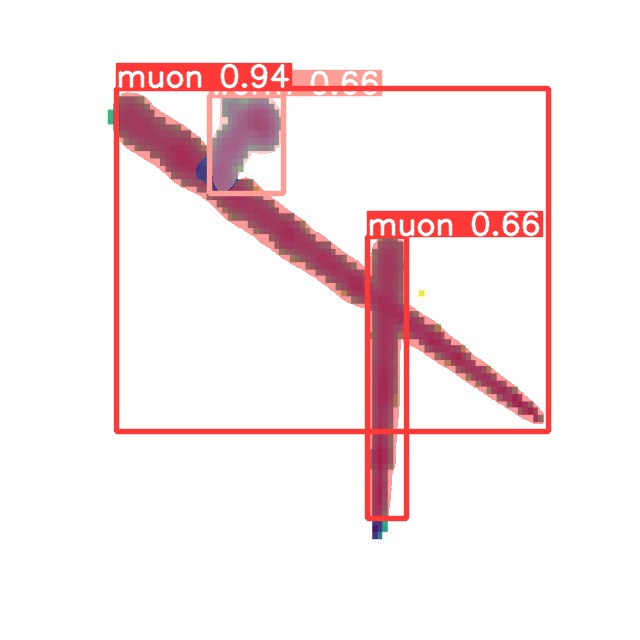

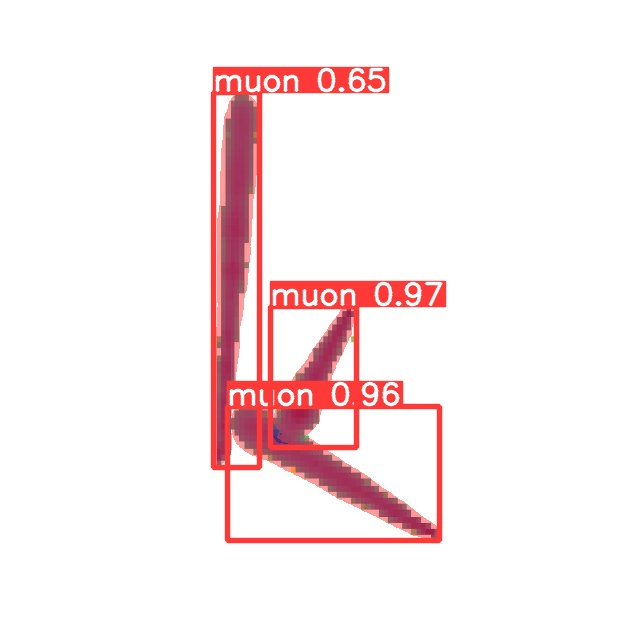

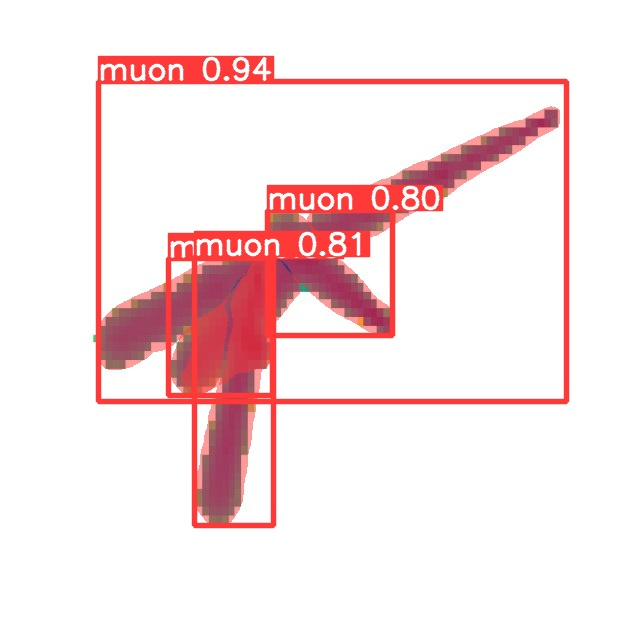

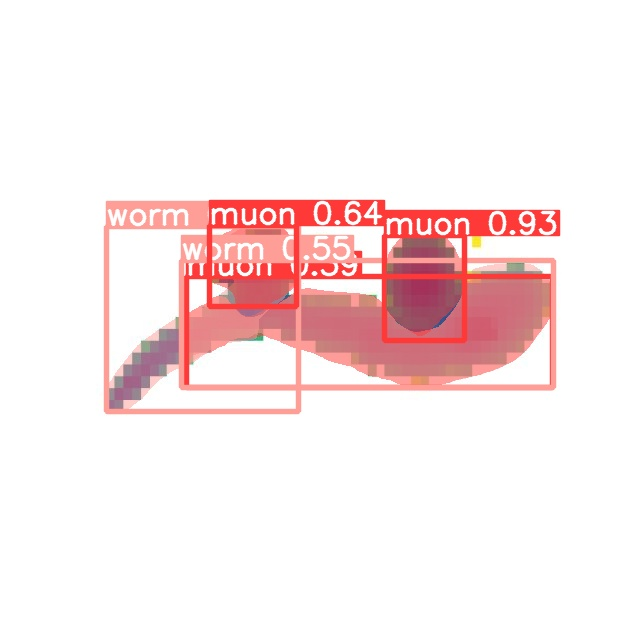

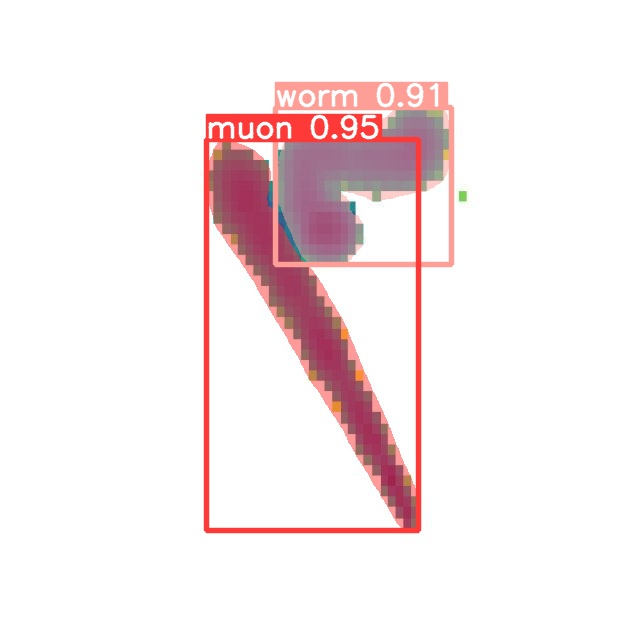

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/test_yolov8n/*.jpg')[:6]:
      display(Image(filename=image_path, height=200))
      print("\n")

## Modelo YOLOV8S-SEG

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 name='epoch100_yolov8s'

/content
100% 22.8M/22.8M [00:00<00:00, 51.3MB/s]
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/MuonDataset-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=epoch100_yolov8s, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, 

In [ ]:
!ls {HOME}/runs/segment/epoch100_yolov8s/

args.yaml					    results.png
BoxF1_curve.png					    train_batch0.jpg
BoxP_curve.png					    train_batch1800.jpg
BoxPR_curve.png					    train_batch1801.jpg
BoxR_curve.png					    train_batch1802.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1678720228.38fc03496b73.1439.0  train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
MaskF1_curve.png				    val_batch1_labels.jpg
MaskP_curve.png					    val_batch1_pred.jpg
MaskPR_curve.png				    val_batch2_labels.jpg
MaskR_curve.png					    val_batch2_pred.jpg
results.csv					    weights


/content


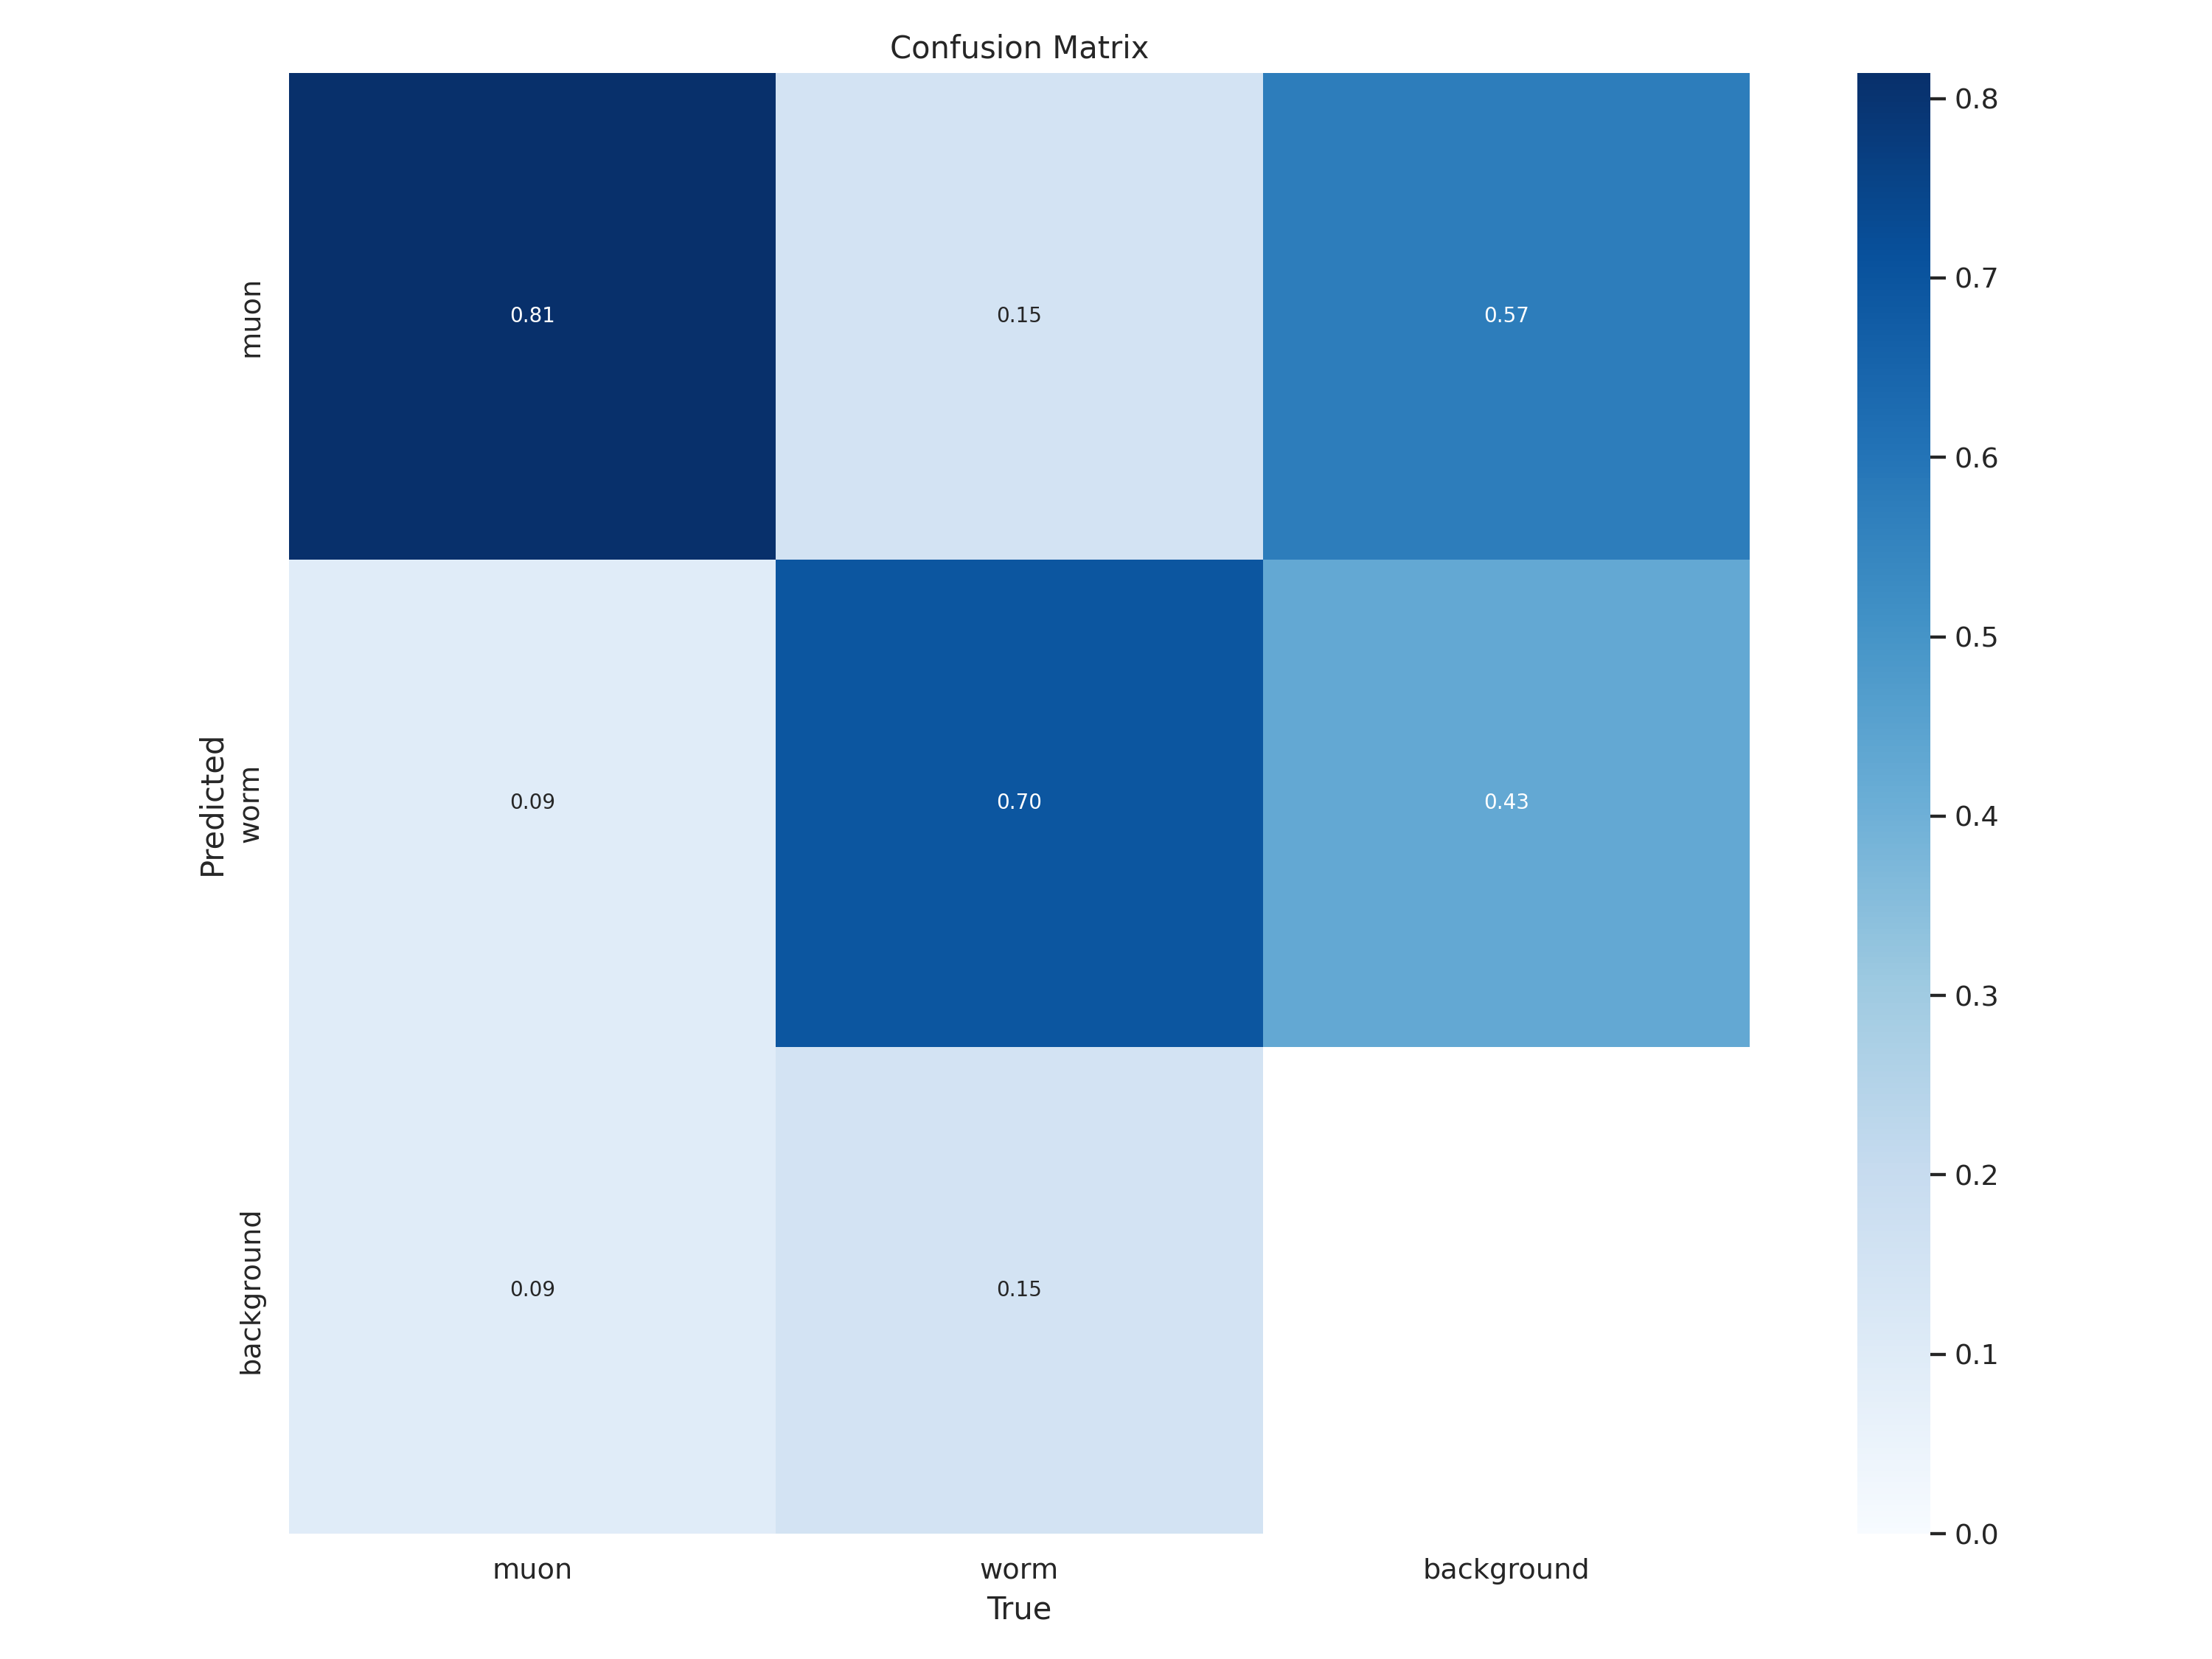

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8s/confusion_matrix.png', width=700)

/content


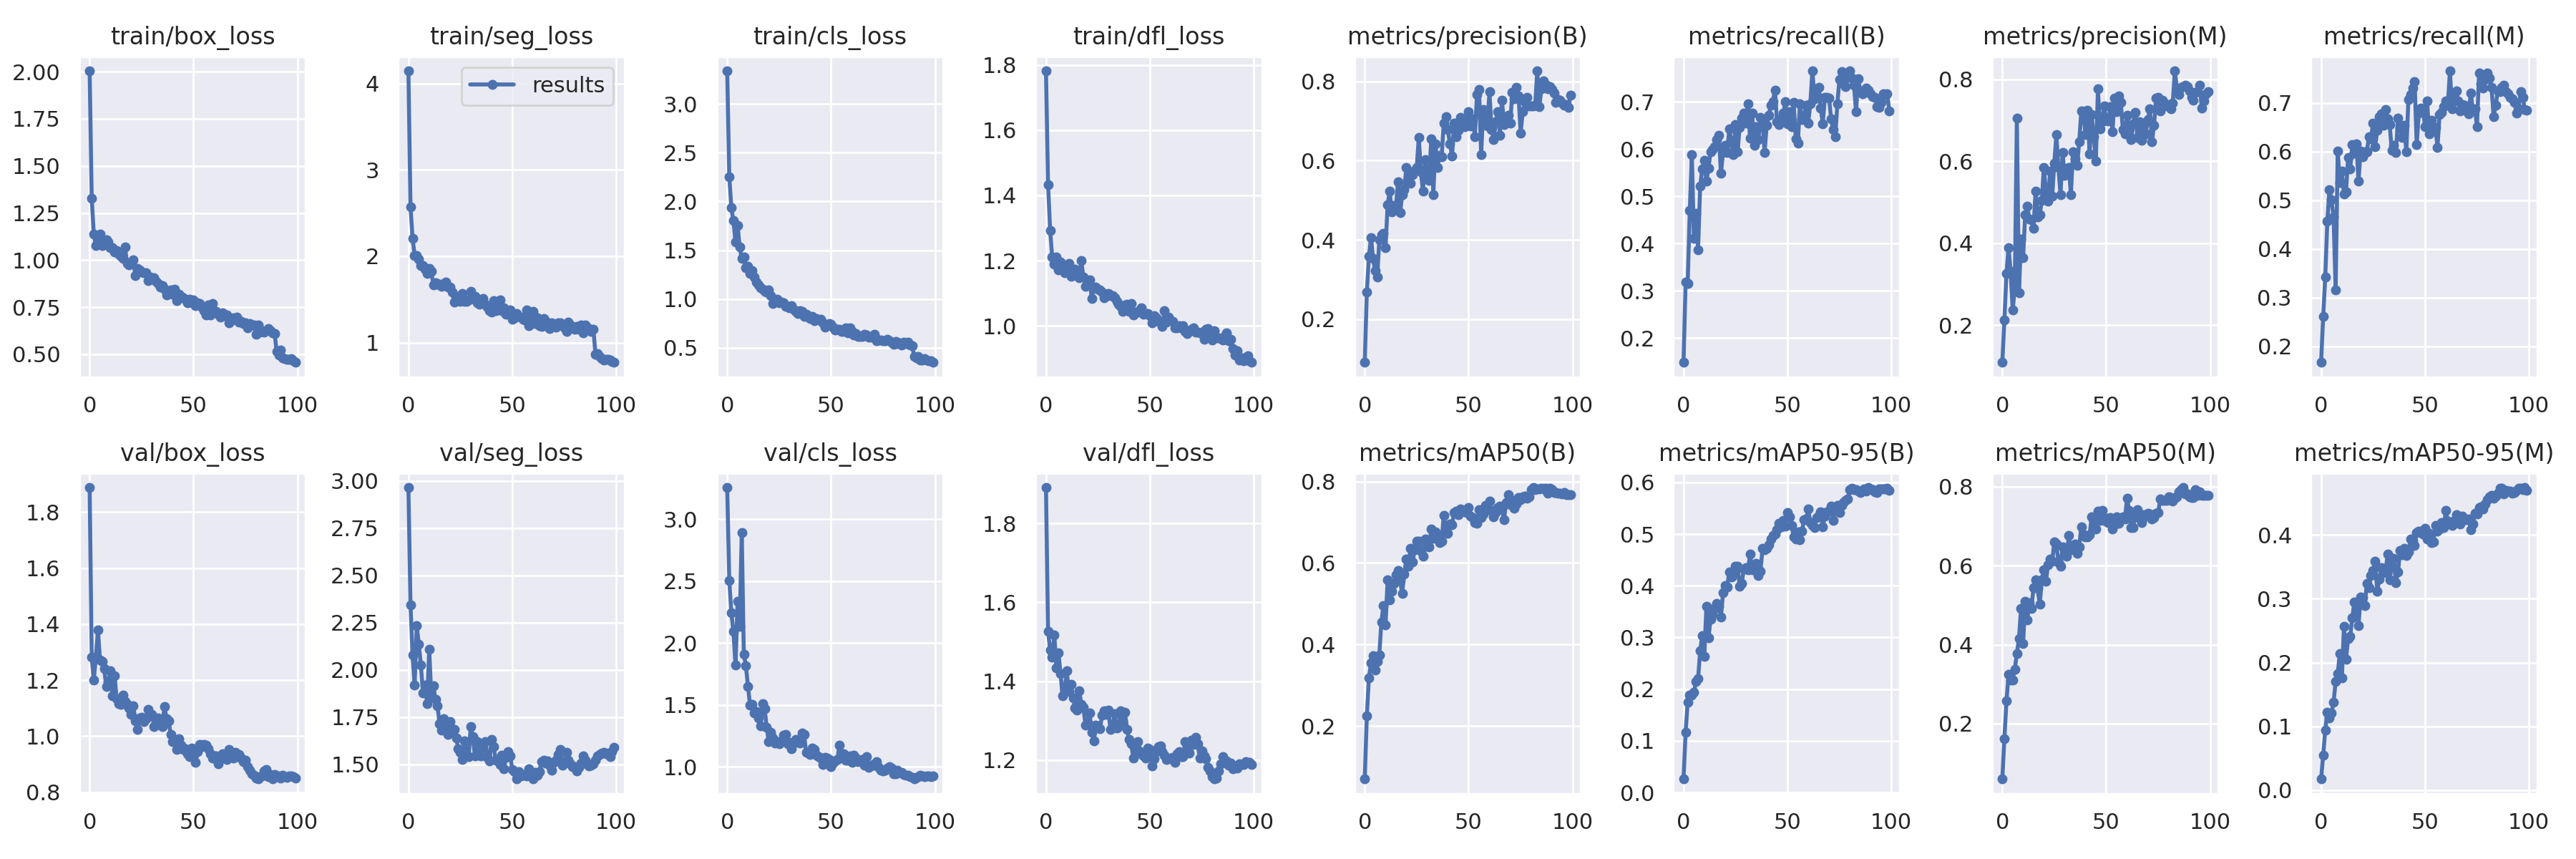

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8s/results.png', width=600)

/content


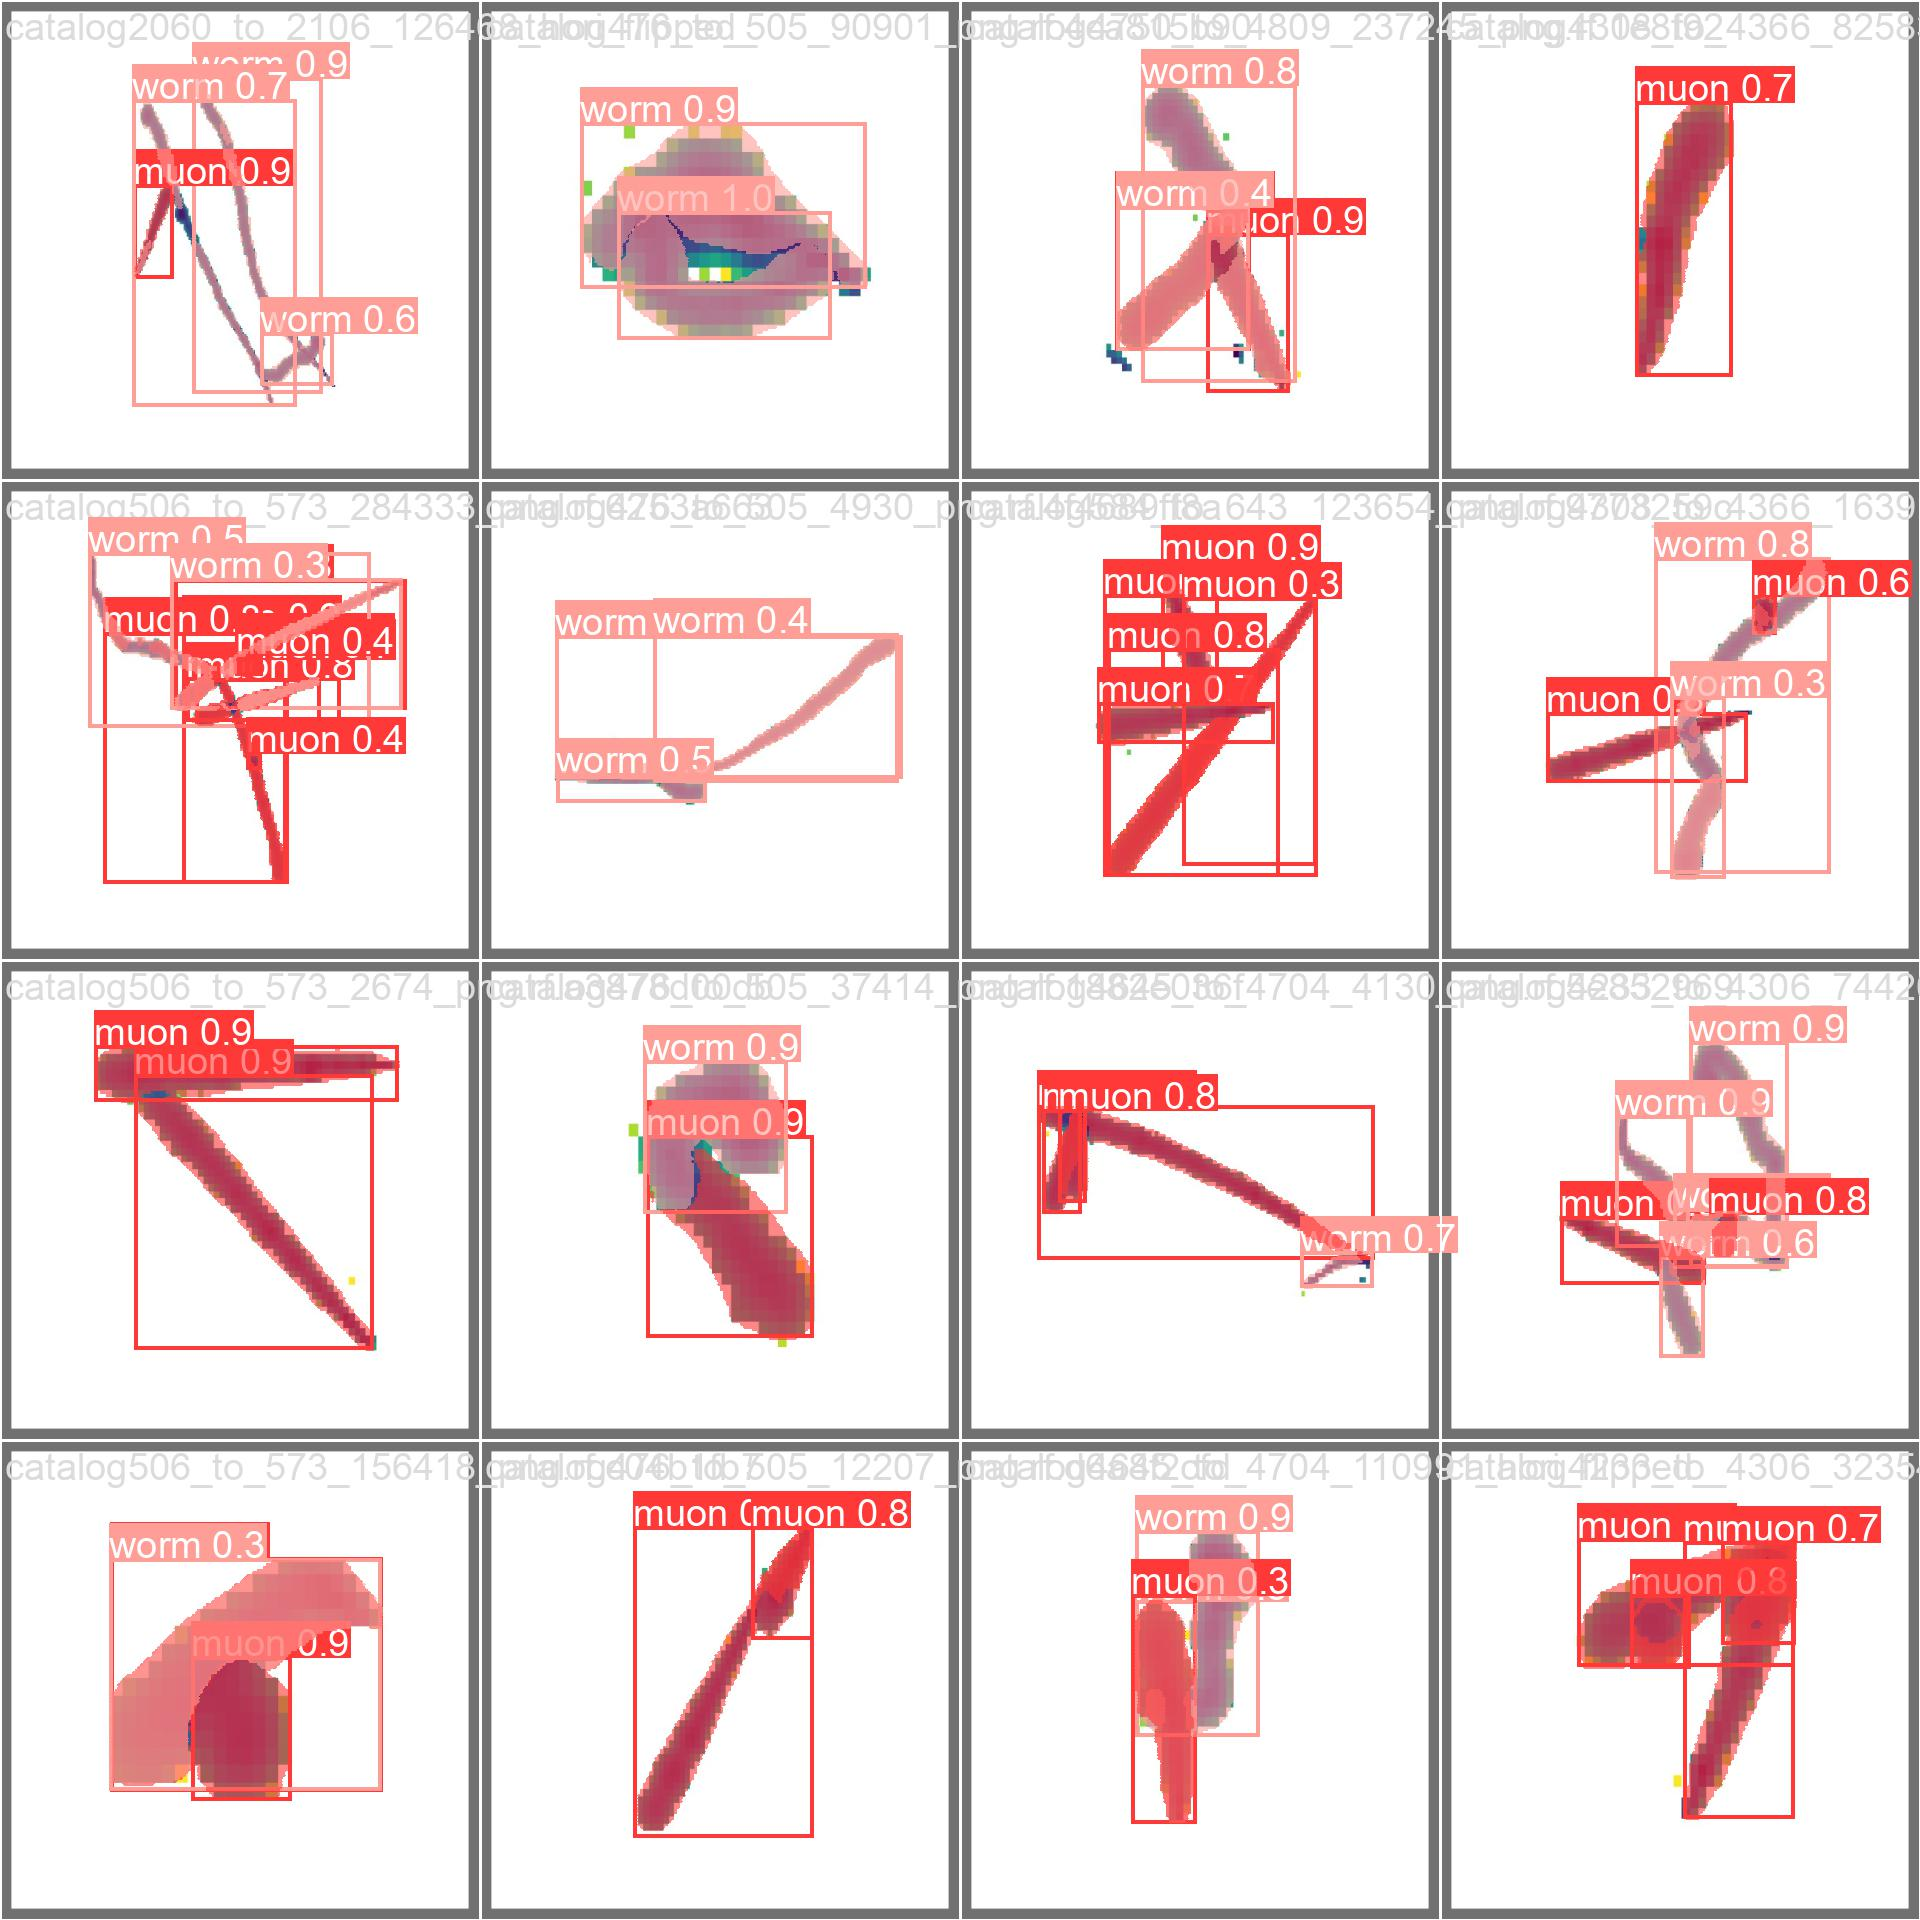

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8s/val_batch0_pred.jpg', width=600)

## Validate YOLOV8S-SEG Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/epoch100_yolov8s/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/MuonDataset-1/valid/labels.cache... 88 images, 0 backgrounds, 0 corrupt: 100% 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:07<00:00,  1.31s/it]
                   all         88        232      0.793      0.723      0.782      0.588      0.782      0.732      0.798      0.475
                  muon         88        140      0.775      0.793      0.839      0.689      0.772        0.8      0.836      0.537
                  worm         88         92      0.811      0.652      0.726      0.487      0.791      0.663      0.759      0.412
Speed: 6.4ms preprocess, 13.9ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/segment/val


## Predict with YOLOV8S-SEG Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/epoch100_yolov8s/weights/best.pt conf=0.25 source={dataset.location}/test/images name='test_yolov8s' save=True

/content
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/43 /content/datasets/MuonDataset-1/test/images/catalog2060_to_2106_143603_png.rf.1e8e0b927baaeaef7c2b5613dbc09f3f.jpg: 640x640 1 muon, 1 worm, 21.8ms
image 2/43 /content/datasets/MuonDataset-1/test/images/catalog2060_to_2106_175983_png.rf.066cb43c40bd7f1a3ff37b7788e5c6f0.jpg: 640x640 3 muons, 1 worm, 21.8ms
image 3/43 /content/datasets/MuonDataset-1/test/images/catalog2110_to_2171_157446_png.rf.91b56c3390422913c596e9a8f0480ce8.jpg: 640x640 2 muons, 1 worm, 21.8ms
image 4/43 /content/datasets/MuonDataset-1/test/images/catalog2110_to_2171_158279_png.rf.a36d137dcc14e93f4b992f5405511ea4.jpg: 640x640 4 muons, 1 worm, 21.8ms
image 5/43 /content/datasets/MuonDataset-1/test/images/catalog2304_to_2353_110927_png.rf.3645e63f71abff1e142be208835621ba.jpg: 640x640 2 muons, 21.8ms
image 6/43 /content/datasets/M

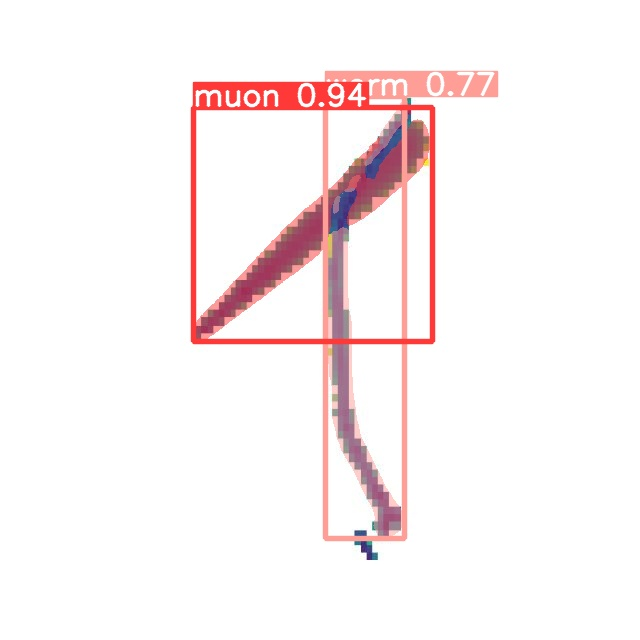

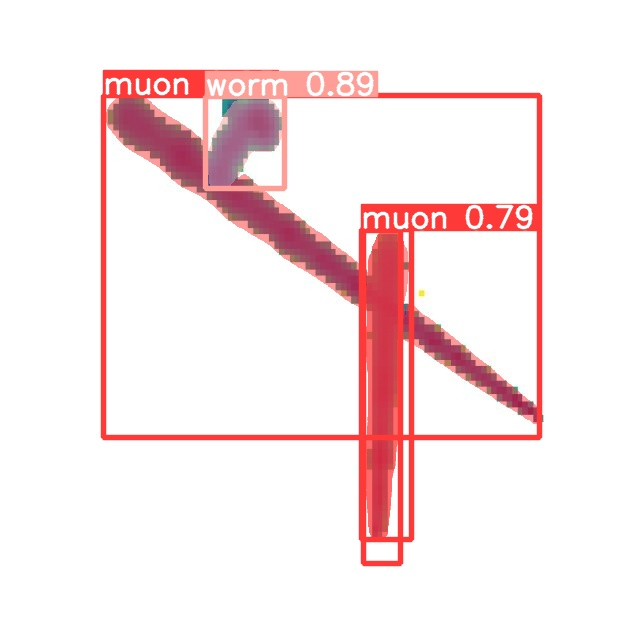

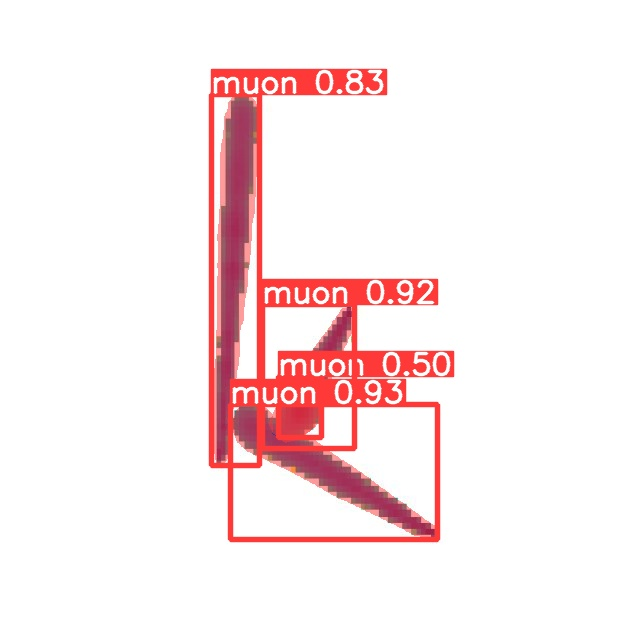

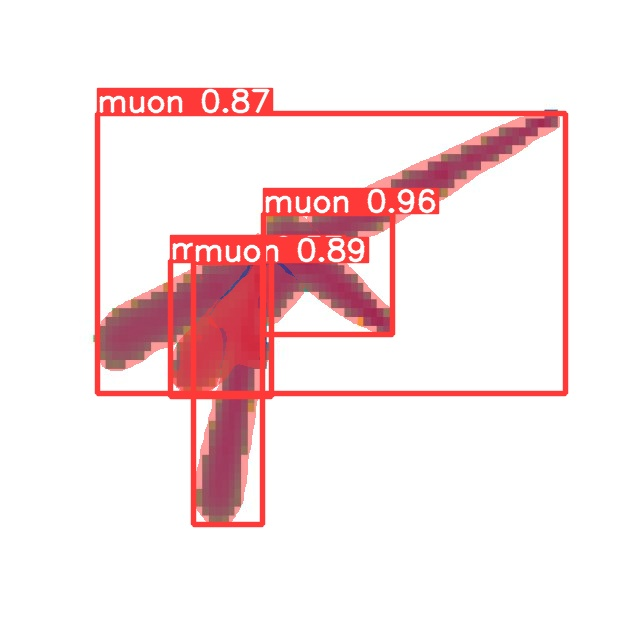

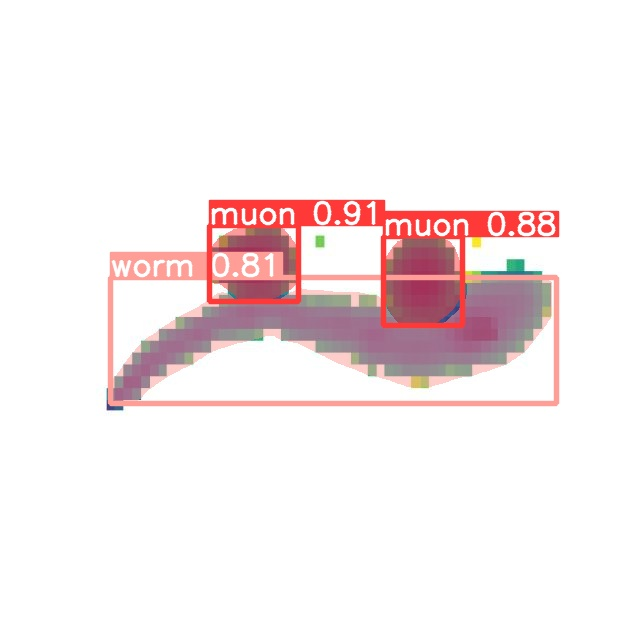

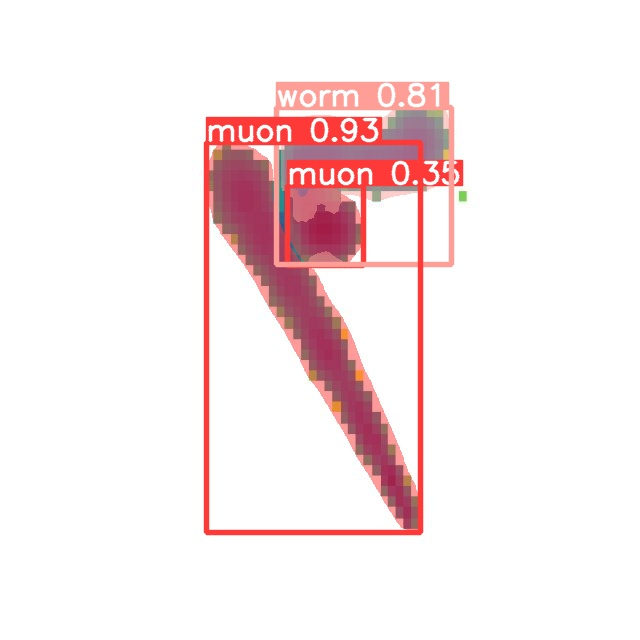

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/test_yolov8s/*.jpg')[:6]:
      display(Image(filename=image_path, height=200))
      print("\n")

## Modelo YOLOv8M-SEG

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 name='epoch100_yolov8m'

/content
100% 52.4M/52.4M [00:01<00:00, 40.0MB/s]
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/MuonDataset-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=epoch100_yolov8m, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, 

In [ ]:
!ls {HOME}/runs/segment/epoch100_yolov8m/

args.yaml					     results.png
BoxF1_curve.png					     train_batch0.jpg
BoxP_curve.png					     train_batch1800.jpg
BoxPR_curve.png					     train_batch1801.jpg
BoxR_curve.png					     train_batch1802.jpg
confusion_matrix.png				     train_batch1.jpg
events.out.tfevents.1678723090.38fc03496b73.16233.0  train_batch2.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
MaskF1_curve.png				     val_batch1_labels.jpg
MaskP_curve.png					     val_batch1_pred.jpg
MaskPR_curve.png				     val_batch2_labels.jpg
MaskR_curve.png					     val_batch2_pred.jpg
results.csv					     weights


/content


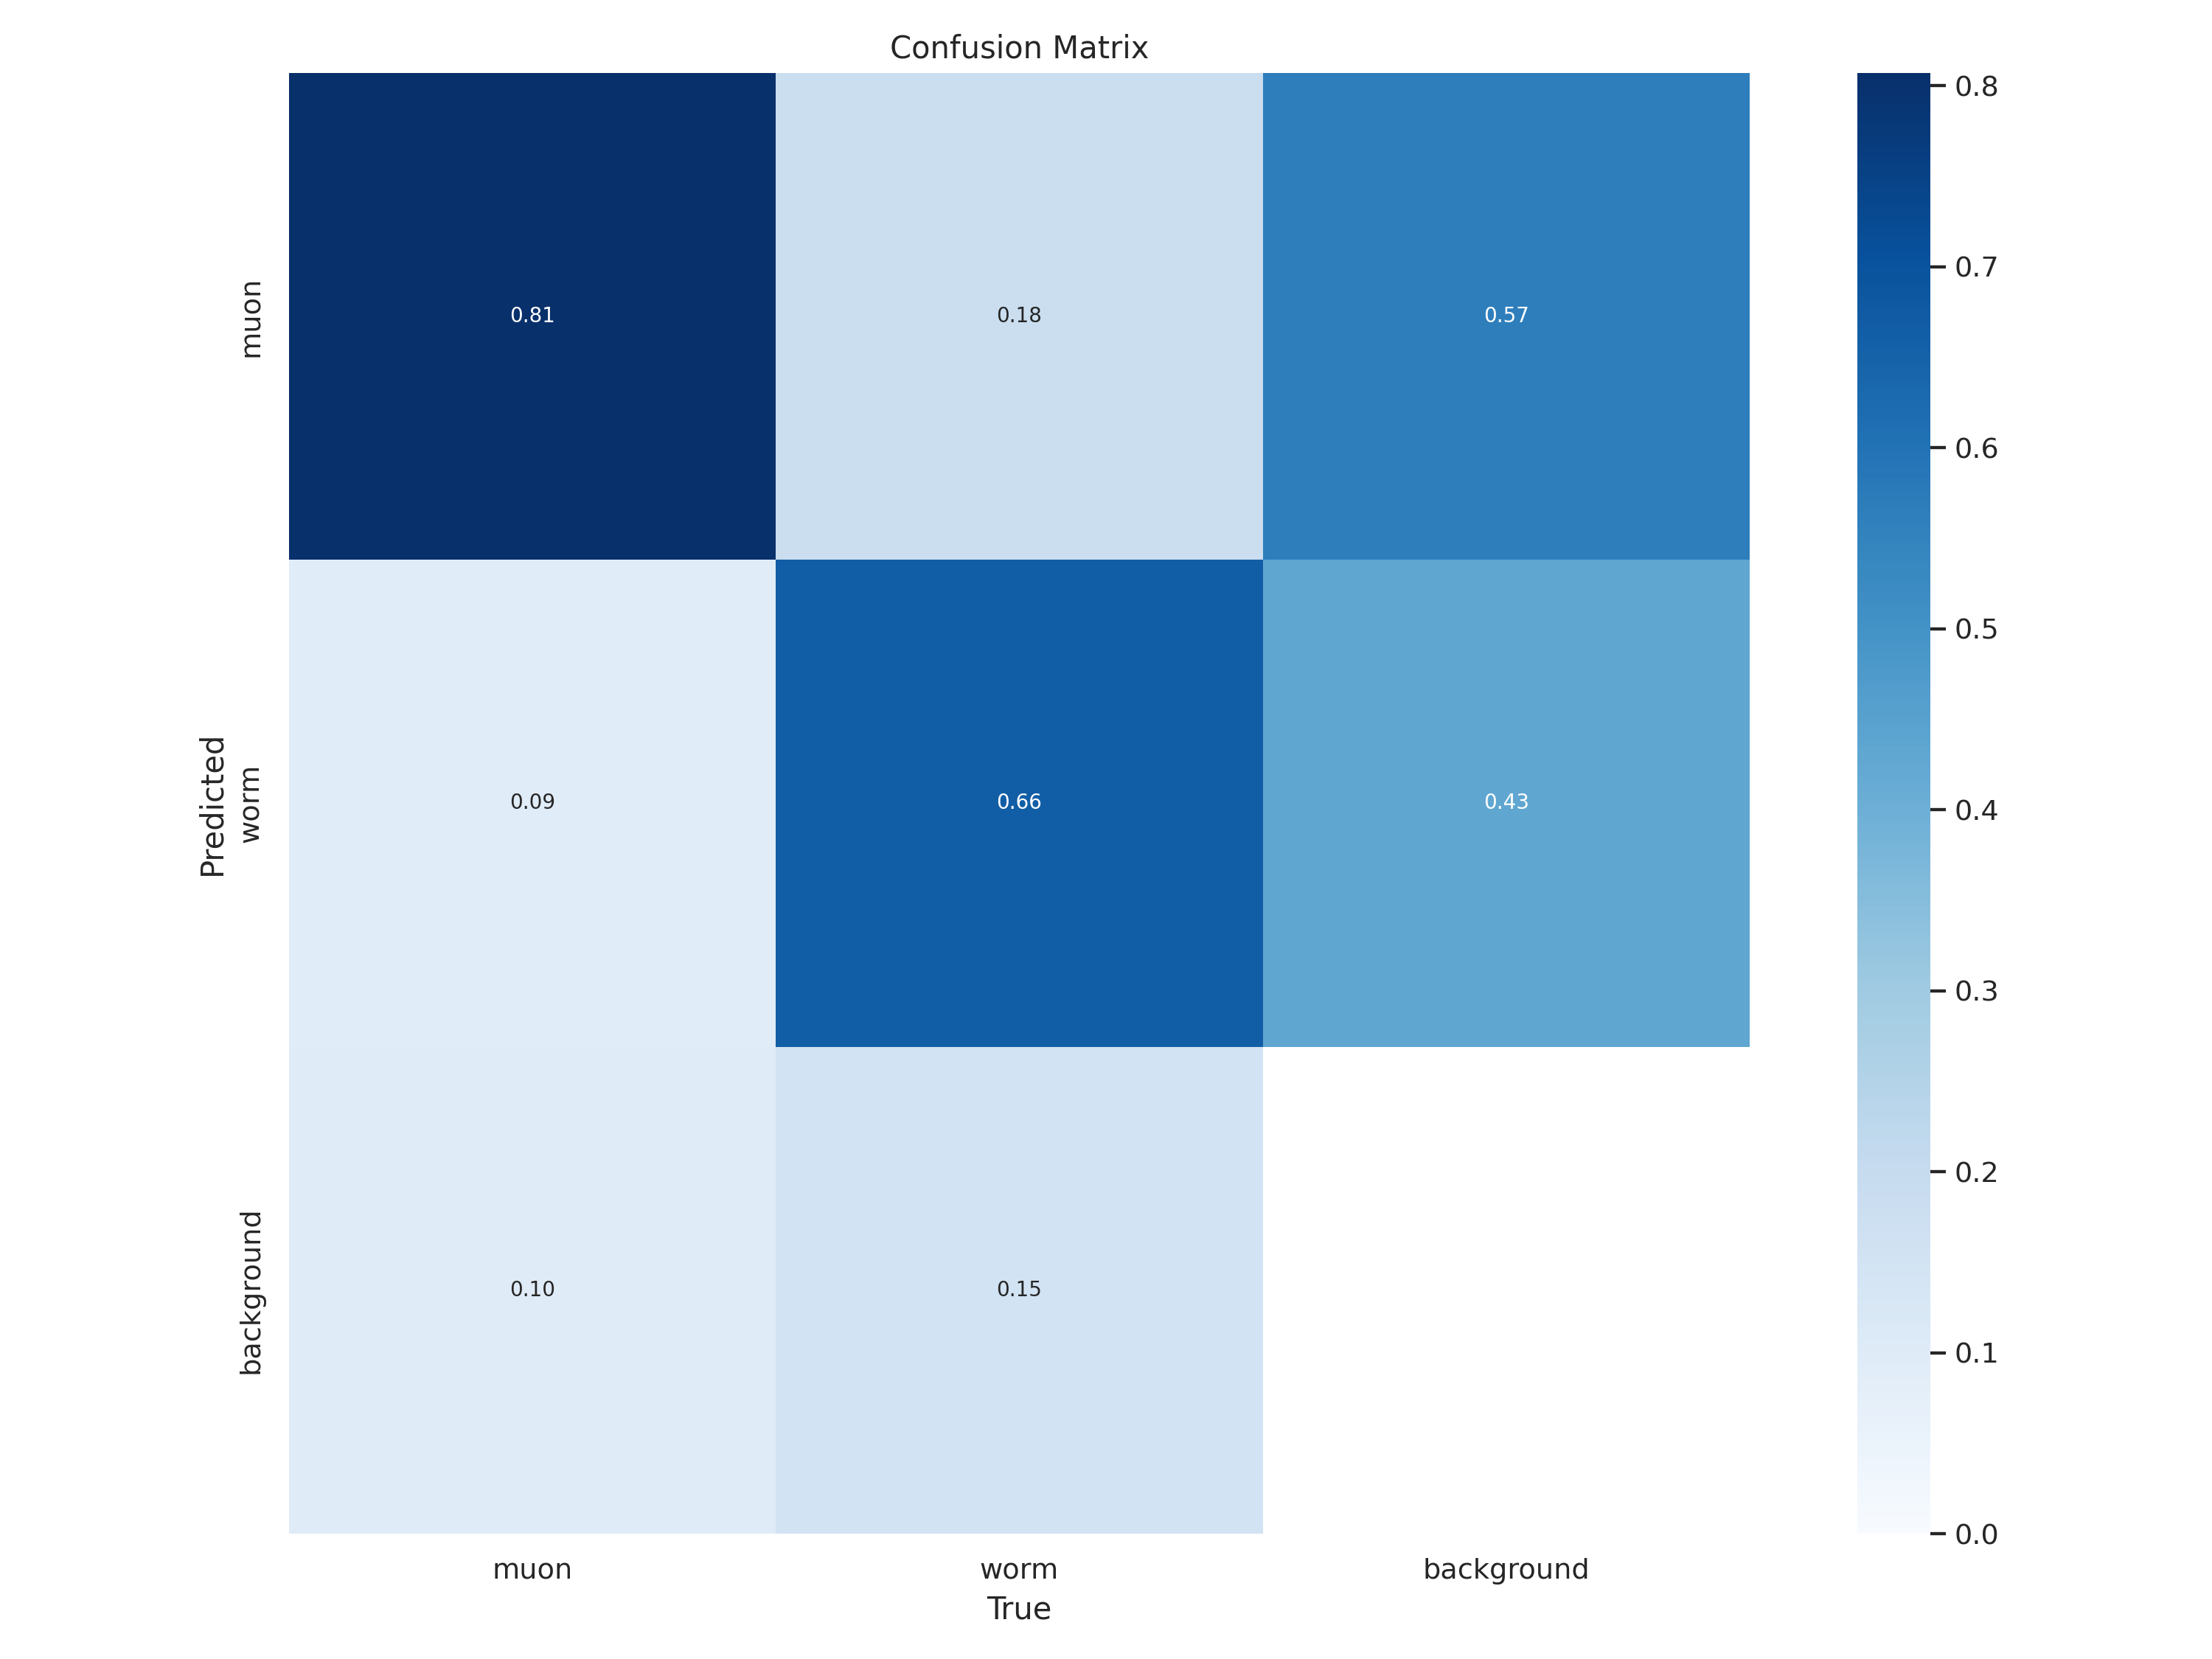

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8m/confusion_matrix.png', width=700)

/content


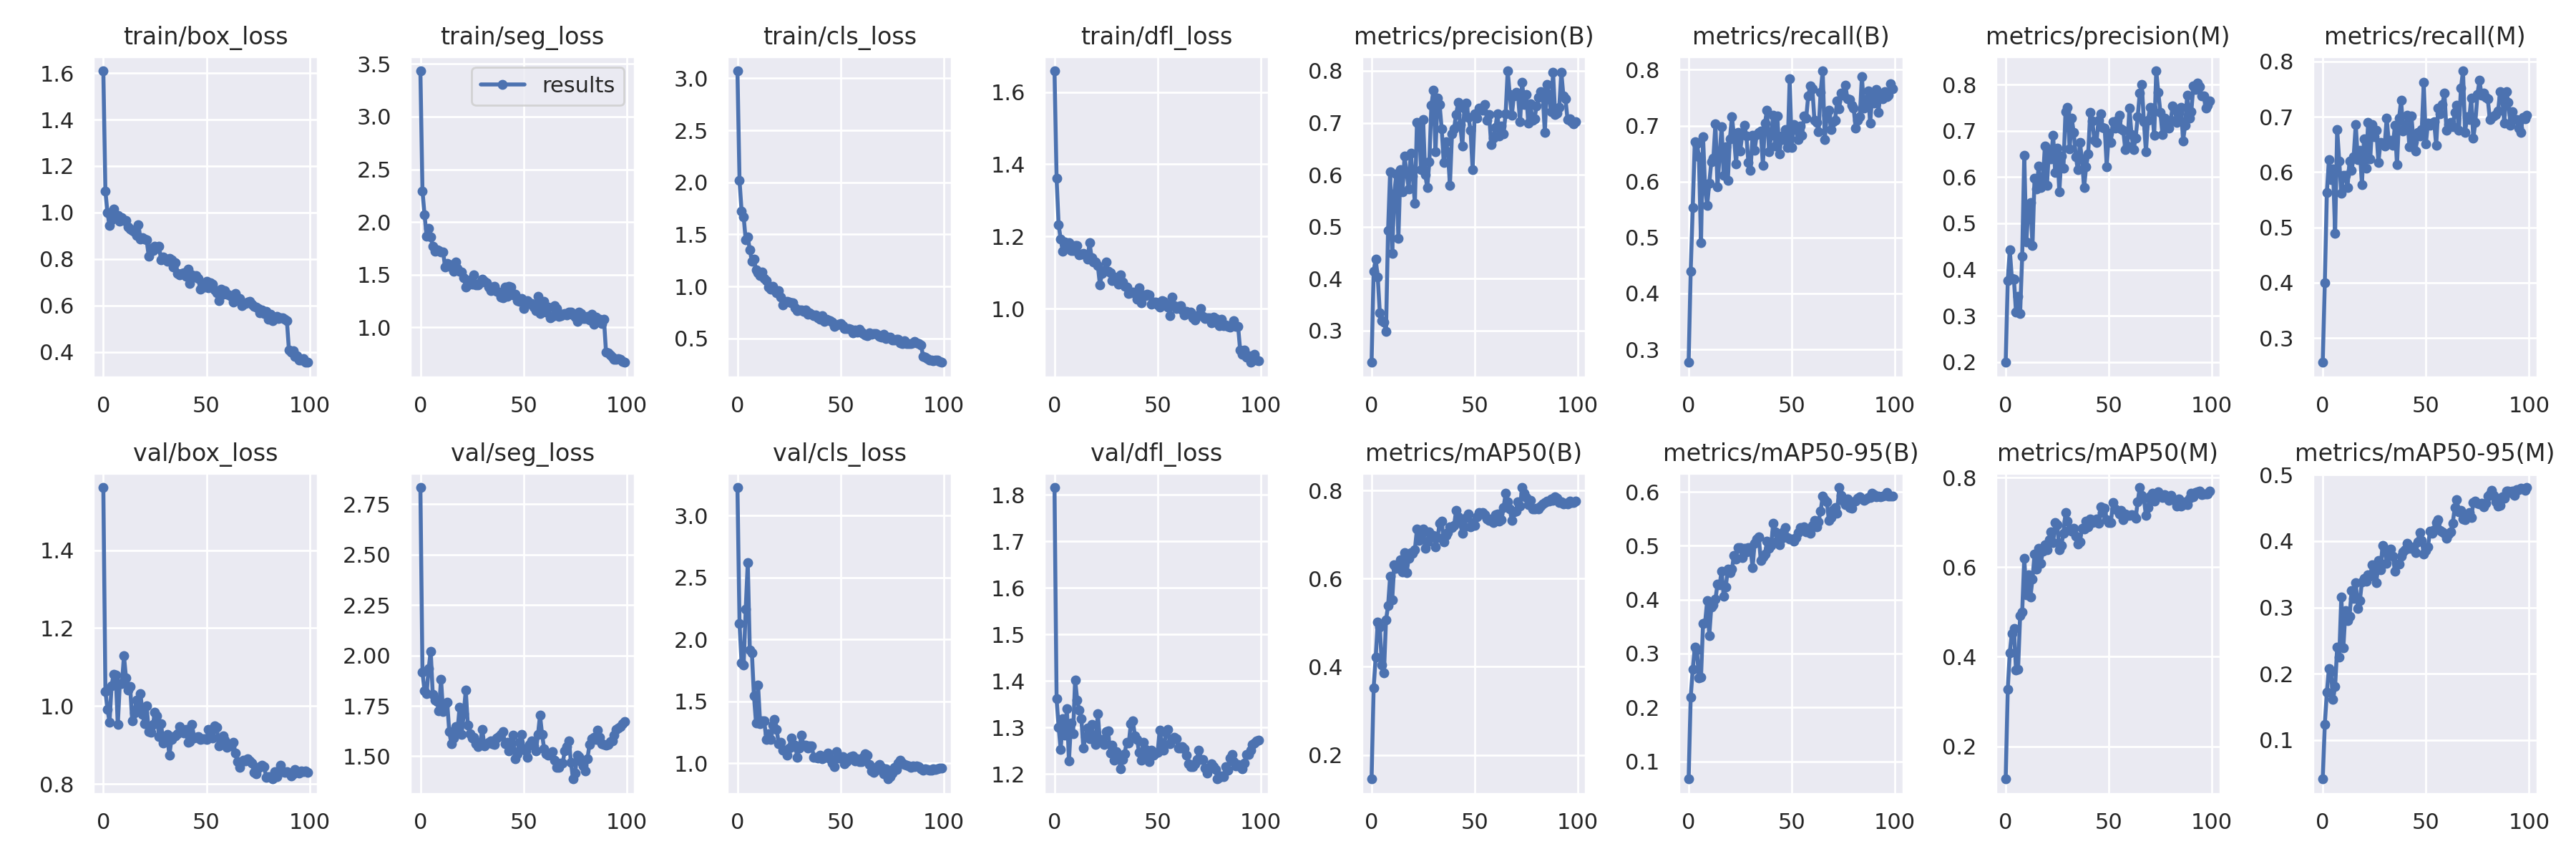

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8m/results.png', width=600)

/content


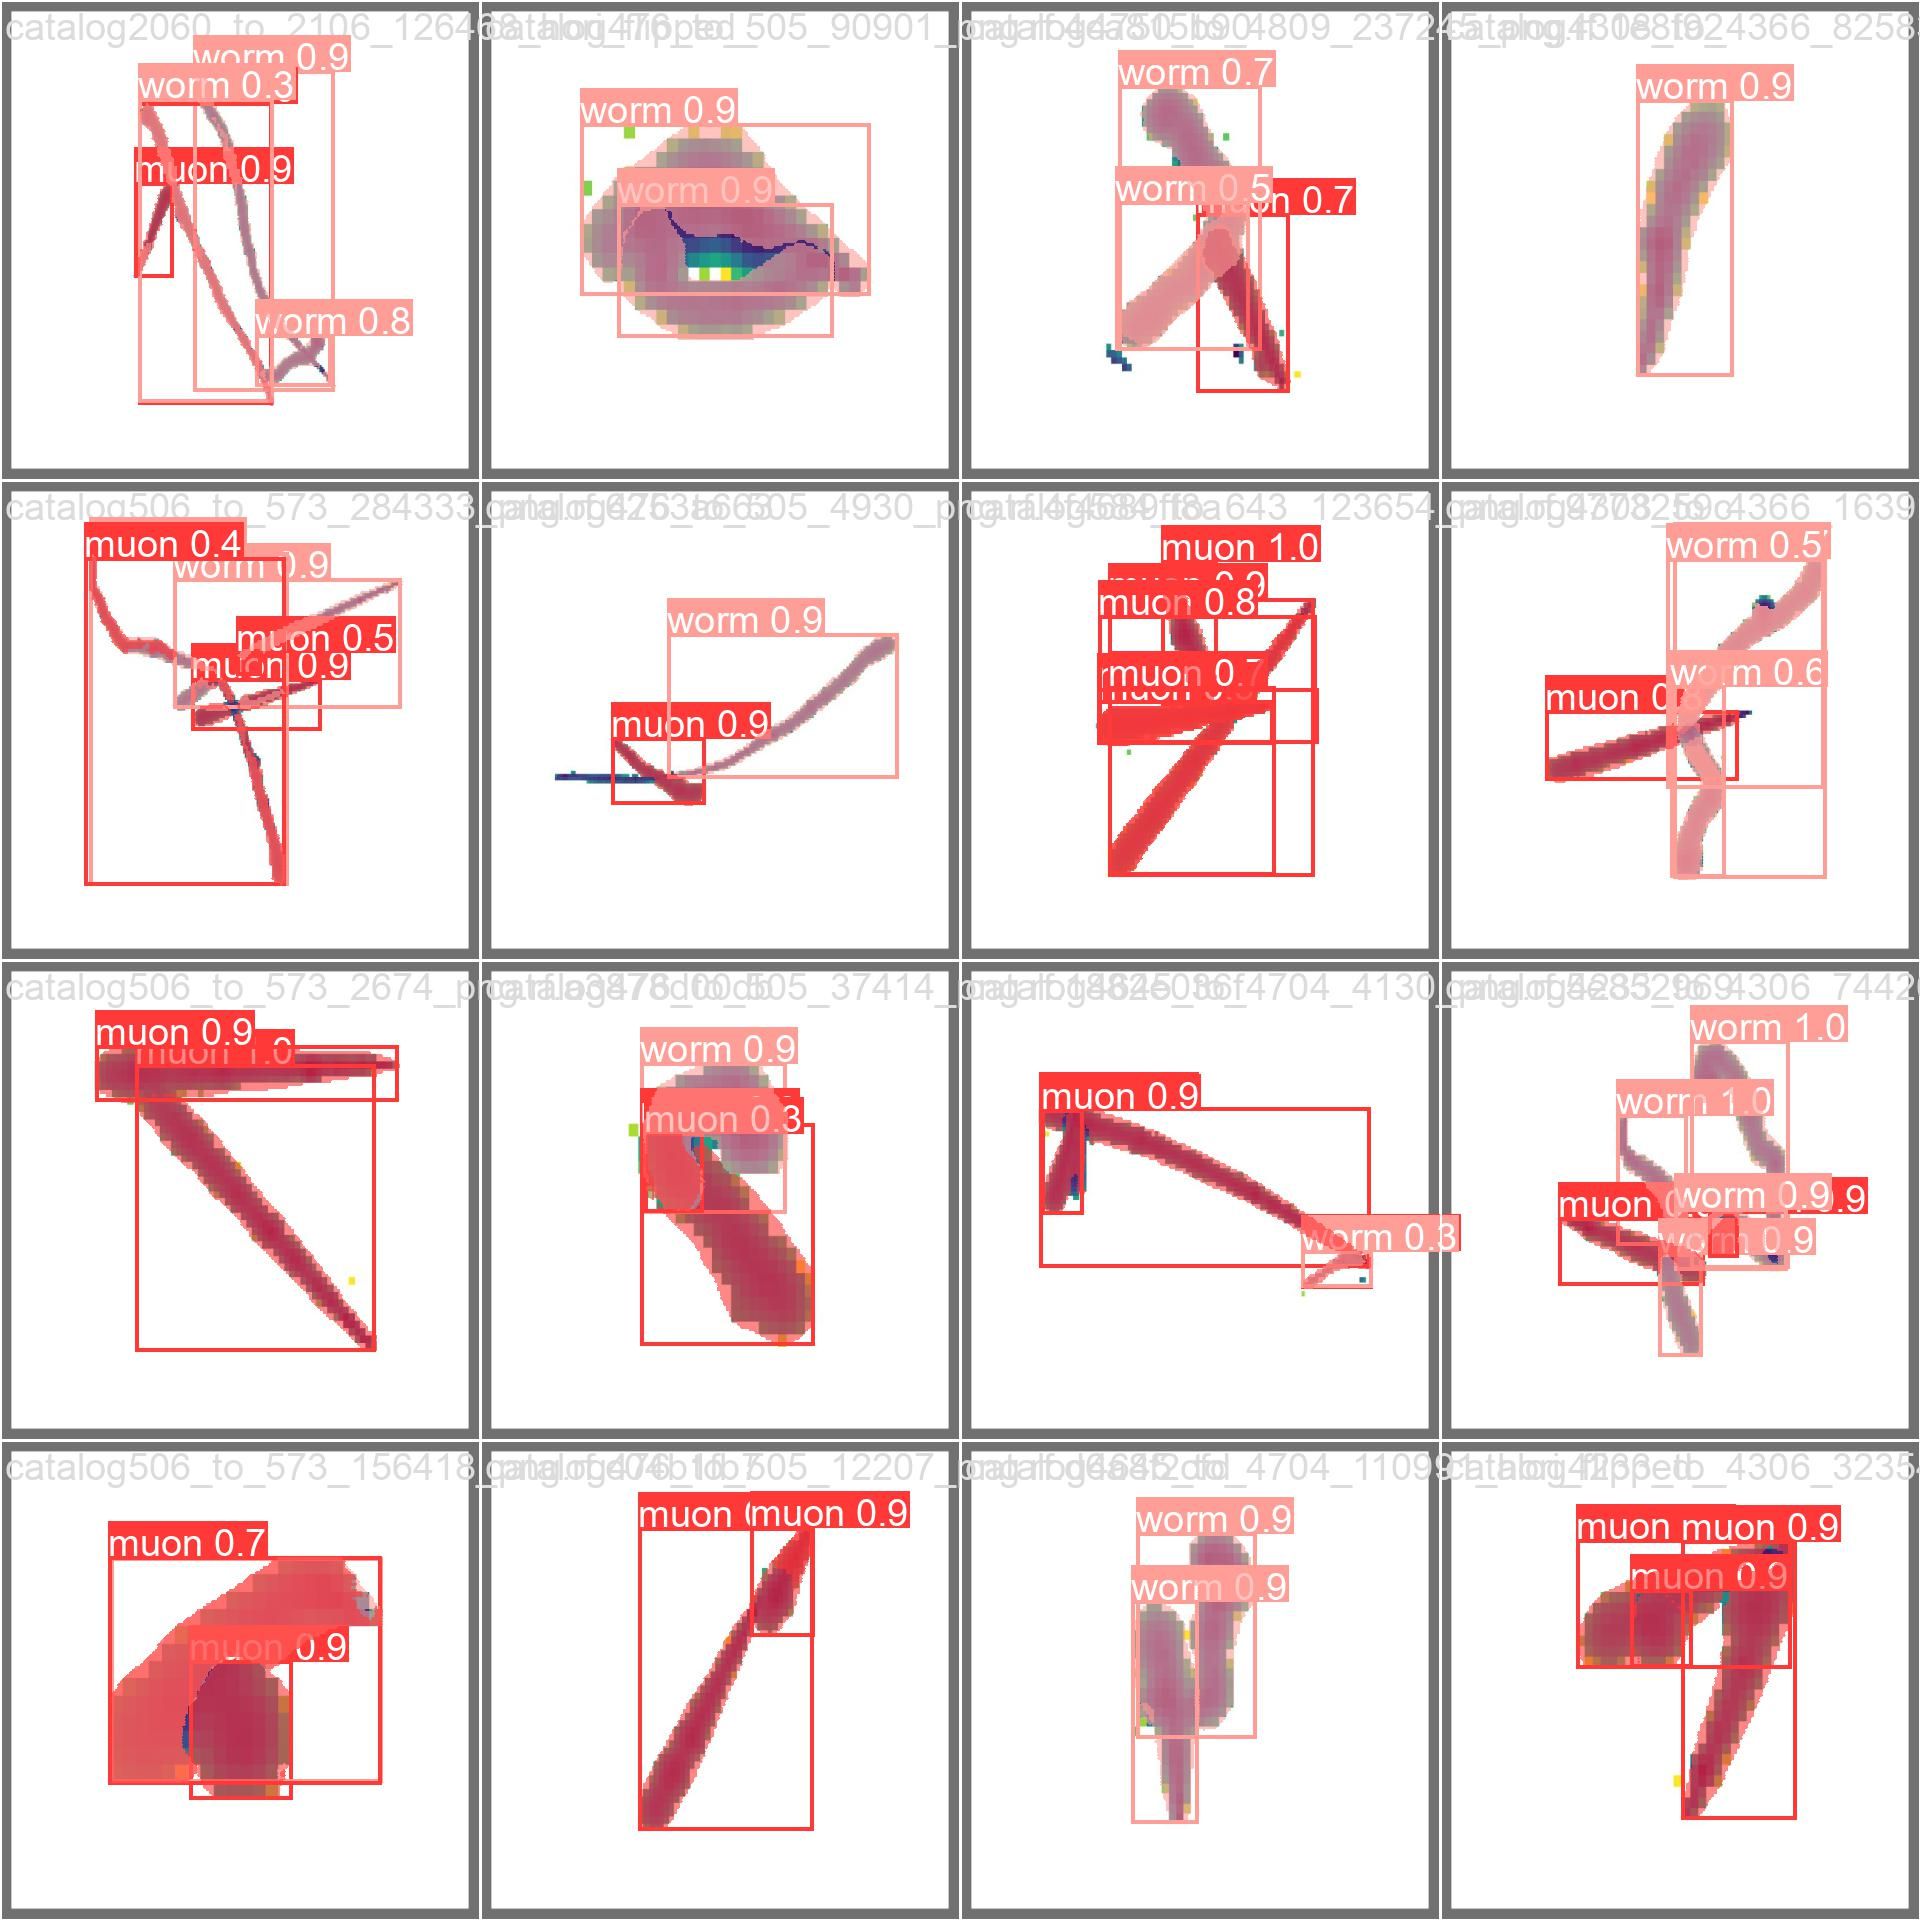

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8m/val_batch0_pred.jpg', width=600)

## Validate Model YOLOv8M-SEG

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/epoch100_yolov8m/weights/best.pt data={dataset.location}/data.yaml name='val_yolov8m'

/content
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/MuonDataset-1/valid/labels.cache... 88 images, 0 backgrounds, 0 corrupt: 100% 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:08<00:00,  1.47s/it]
                   all         88        232      0.707      0.751      0.776      0.597      0.775      0.671      0.762      0.477
                  muon         88        140      0.731      0.807      0.839        0.7      0.785      0.756      0.822      0.555
                  worm         88         92      0.684      0.696      0.712      0.493      0.765      0.587      0.703        0.4
Speed: 4.7ms preprocess, 28.3ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/segment/val

##Predict Model YOLOv8M-SEG

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/epoch100_yolov8m/weights/best.pt conf=0.25 source={dataset.location}/test/images name='test_yolov8m' save=True

/content
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs

image 1/43 /content/datasets/MuonDataset-1/test/images/catalog2060_to_2106_143603_png.rf.1e8e0b927baaeaef7c2b5613dbc09f3f.jpg: 640x640 1 muon, 1 worm, 46.9ms
image 2/43 /content/datasets/MuonDataset-1/test/images/catalog2060_to_2106_175983_png.rf.066cb43c40bd7f1a3ff37b7788e5c6f0.jpg: 640x640 2 muons, 1 worm, 46.8ms
image 3/43 /content/datasets/MuonDataset-1/test/images/catalog2110_to_2171_157446_png.rf.91b56c3390422913c596e9a8f0480ce8.jpg: 640x640 2 muons, 1 worm, 29.2ms
image 4/43 /content/datasets/MuonDataset-1/test/images/catalog2110_to_2171_158279_png.rf.a36d137dcc14e93f4b992f5405511ea4.jpg: 640x640 4 muons, 30.0ms
image 5/43 /content/datasets/MuonDataset-1/test/images/catalog2304_to_2353_110927_png.rf.3645e63f71abff1e142be208835621ba.jpg: 640x640 2 muons, 28.8ms
image 6/43 /content/datasets/MuonData

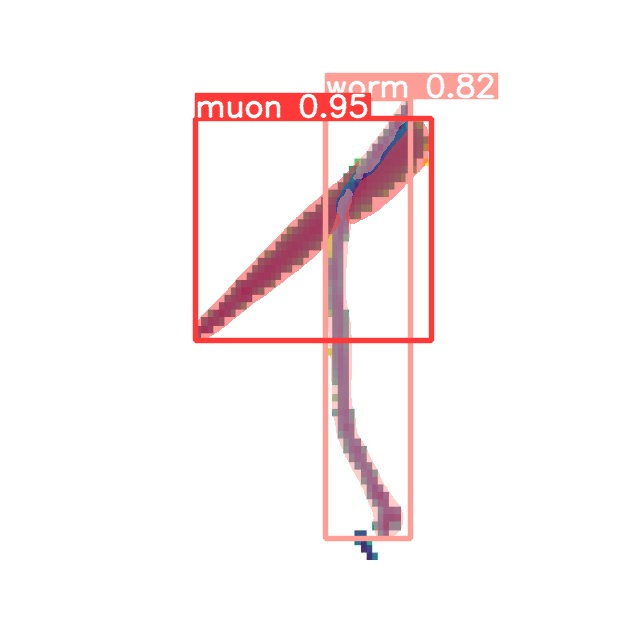

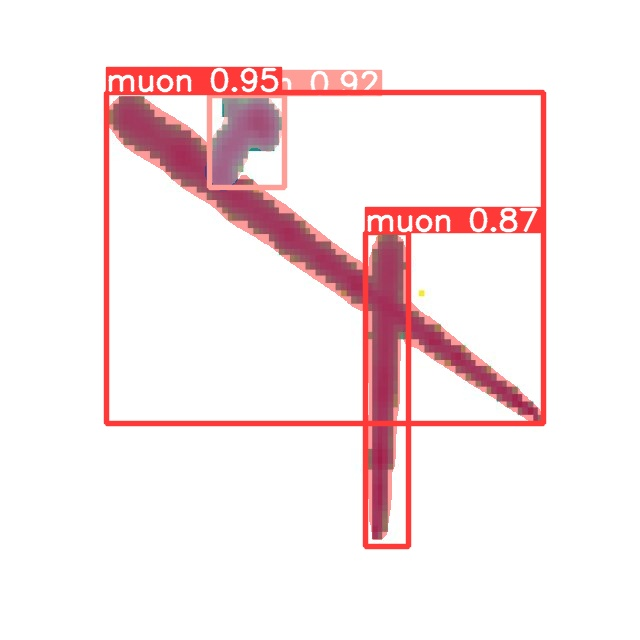

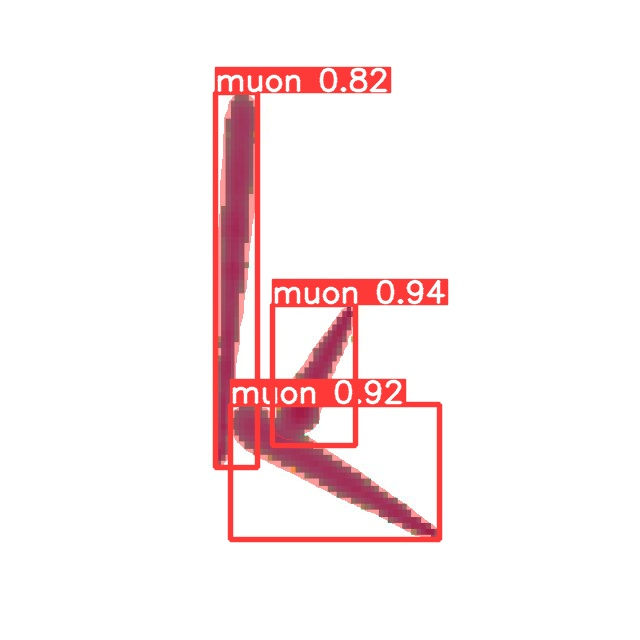

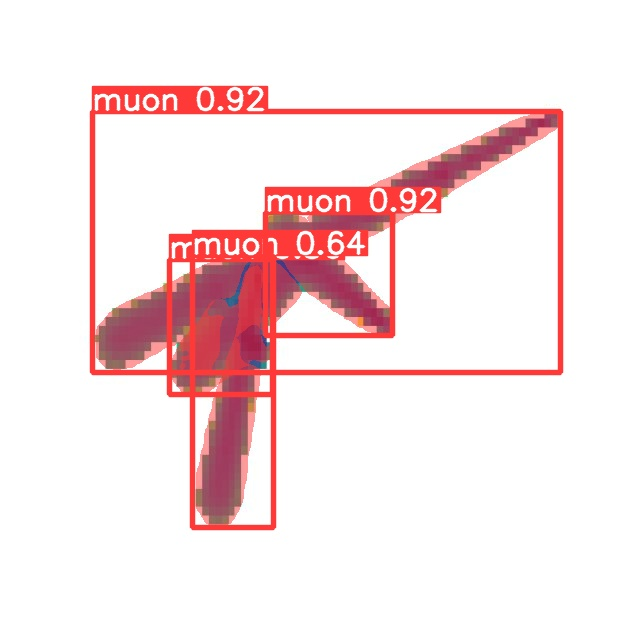

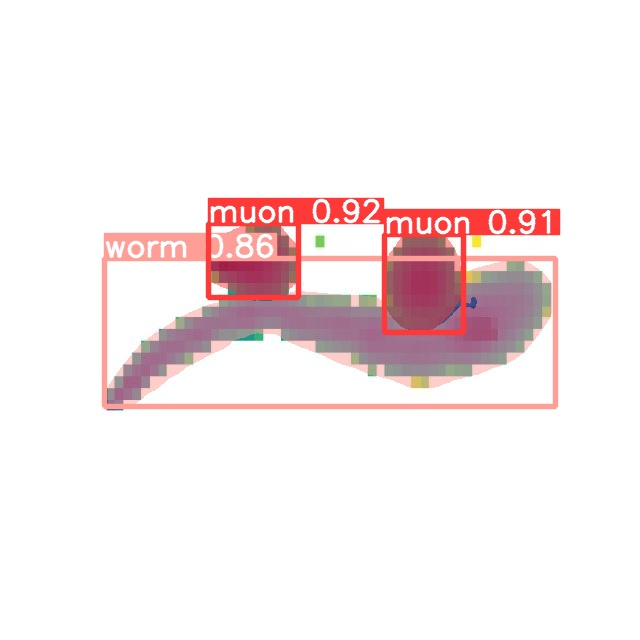

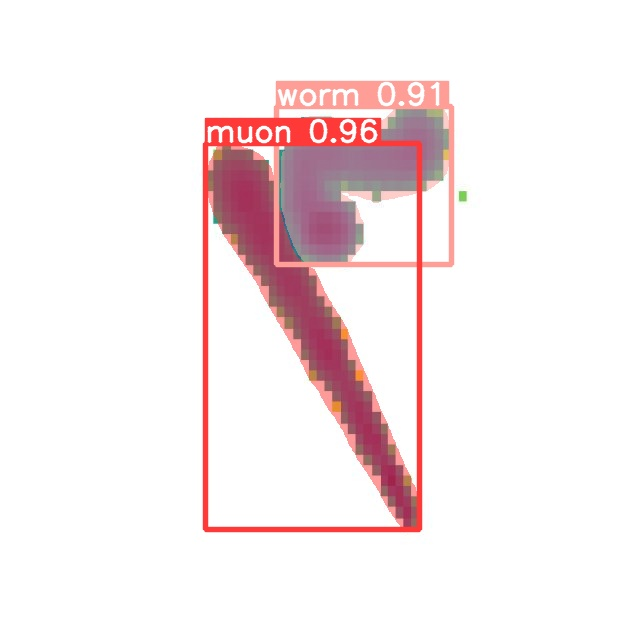

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/test_yolov8m/*.jpg')[:6]:
      display(Image(filename=image_path, height=200))
      print("\n")

##Model YOLOv8l-SEG

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8l-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 name='epoch100_yolov8l'

/content
100% 88.1M/88.1M [00:01<00:00, 61.9MB/s]
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/datasets/MuonDataset-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=epoch100_yolov8l, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, 

In [ ]:
!ls {HOME}/runs/segment/epoch100_yolov8l/

args.yaml					     results.png
BoxF1_curve.png					     train_batch0.jpg
BoxP_curve.png					     train_batch1800.jpg
BoxPR_curve.png					     train_batch1801.jpg
BoxR_curve.png					     train_batch1802.jpg
confusion_matrix.png				     train_batch1.jpg
events.out.tfevents.1678726231.38fc03496b73.32190.0  train_batch2.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
MaskF1_curve.png				     val_batch1_labels.jpg
MaskP_curve.png					     val_batch1_pred.jpg
MaskPR_curve.png				     val_batch2_labels.jpg
MaskR_curve.png					     val_batch2_pred.jpg
results.csv					     weights


/content


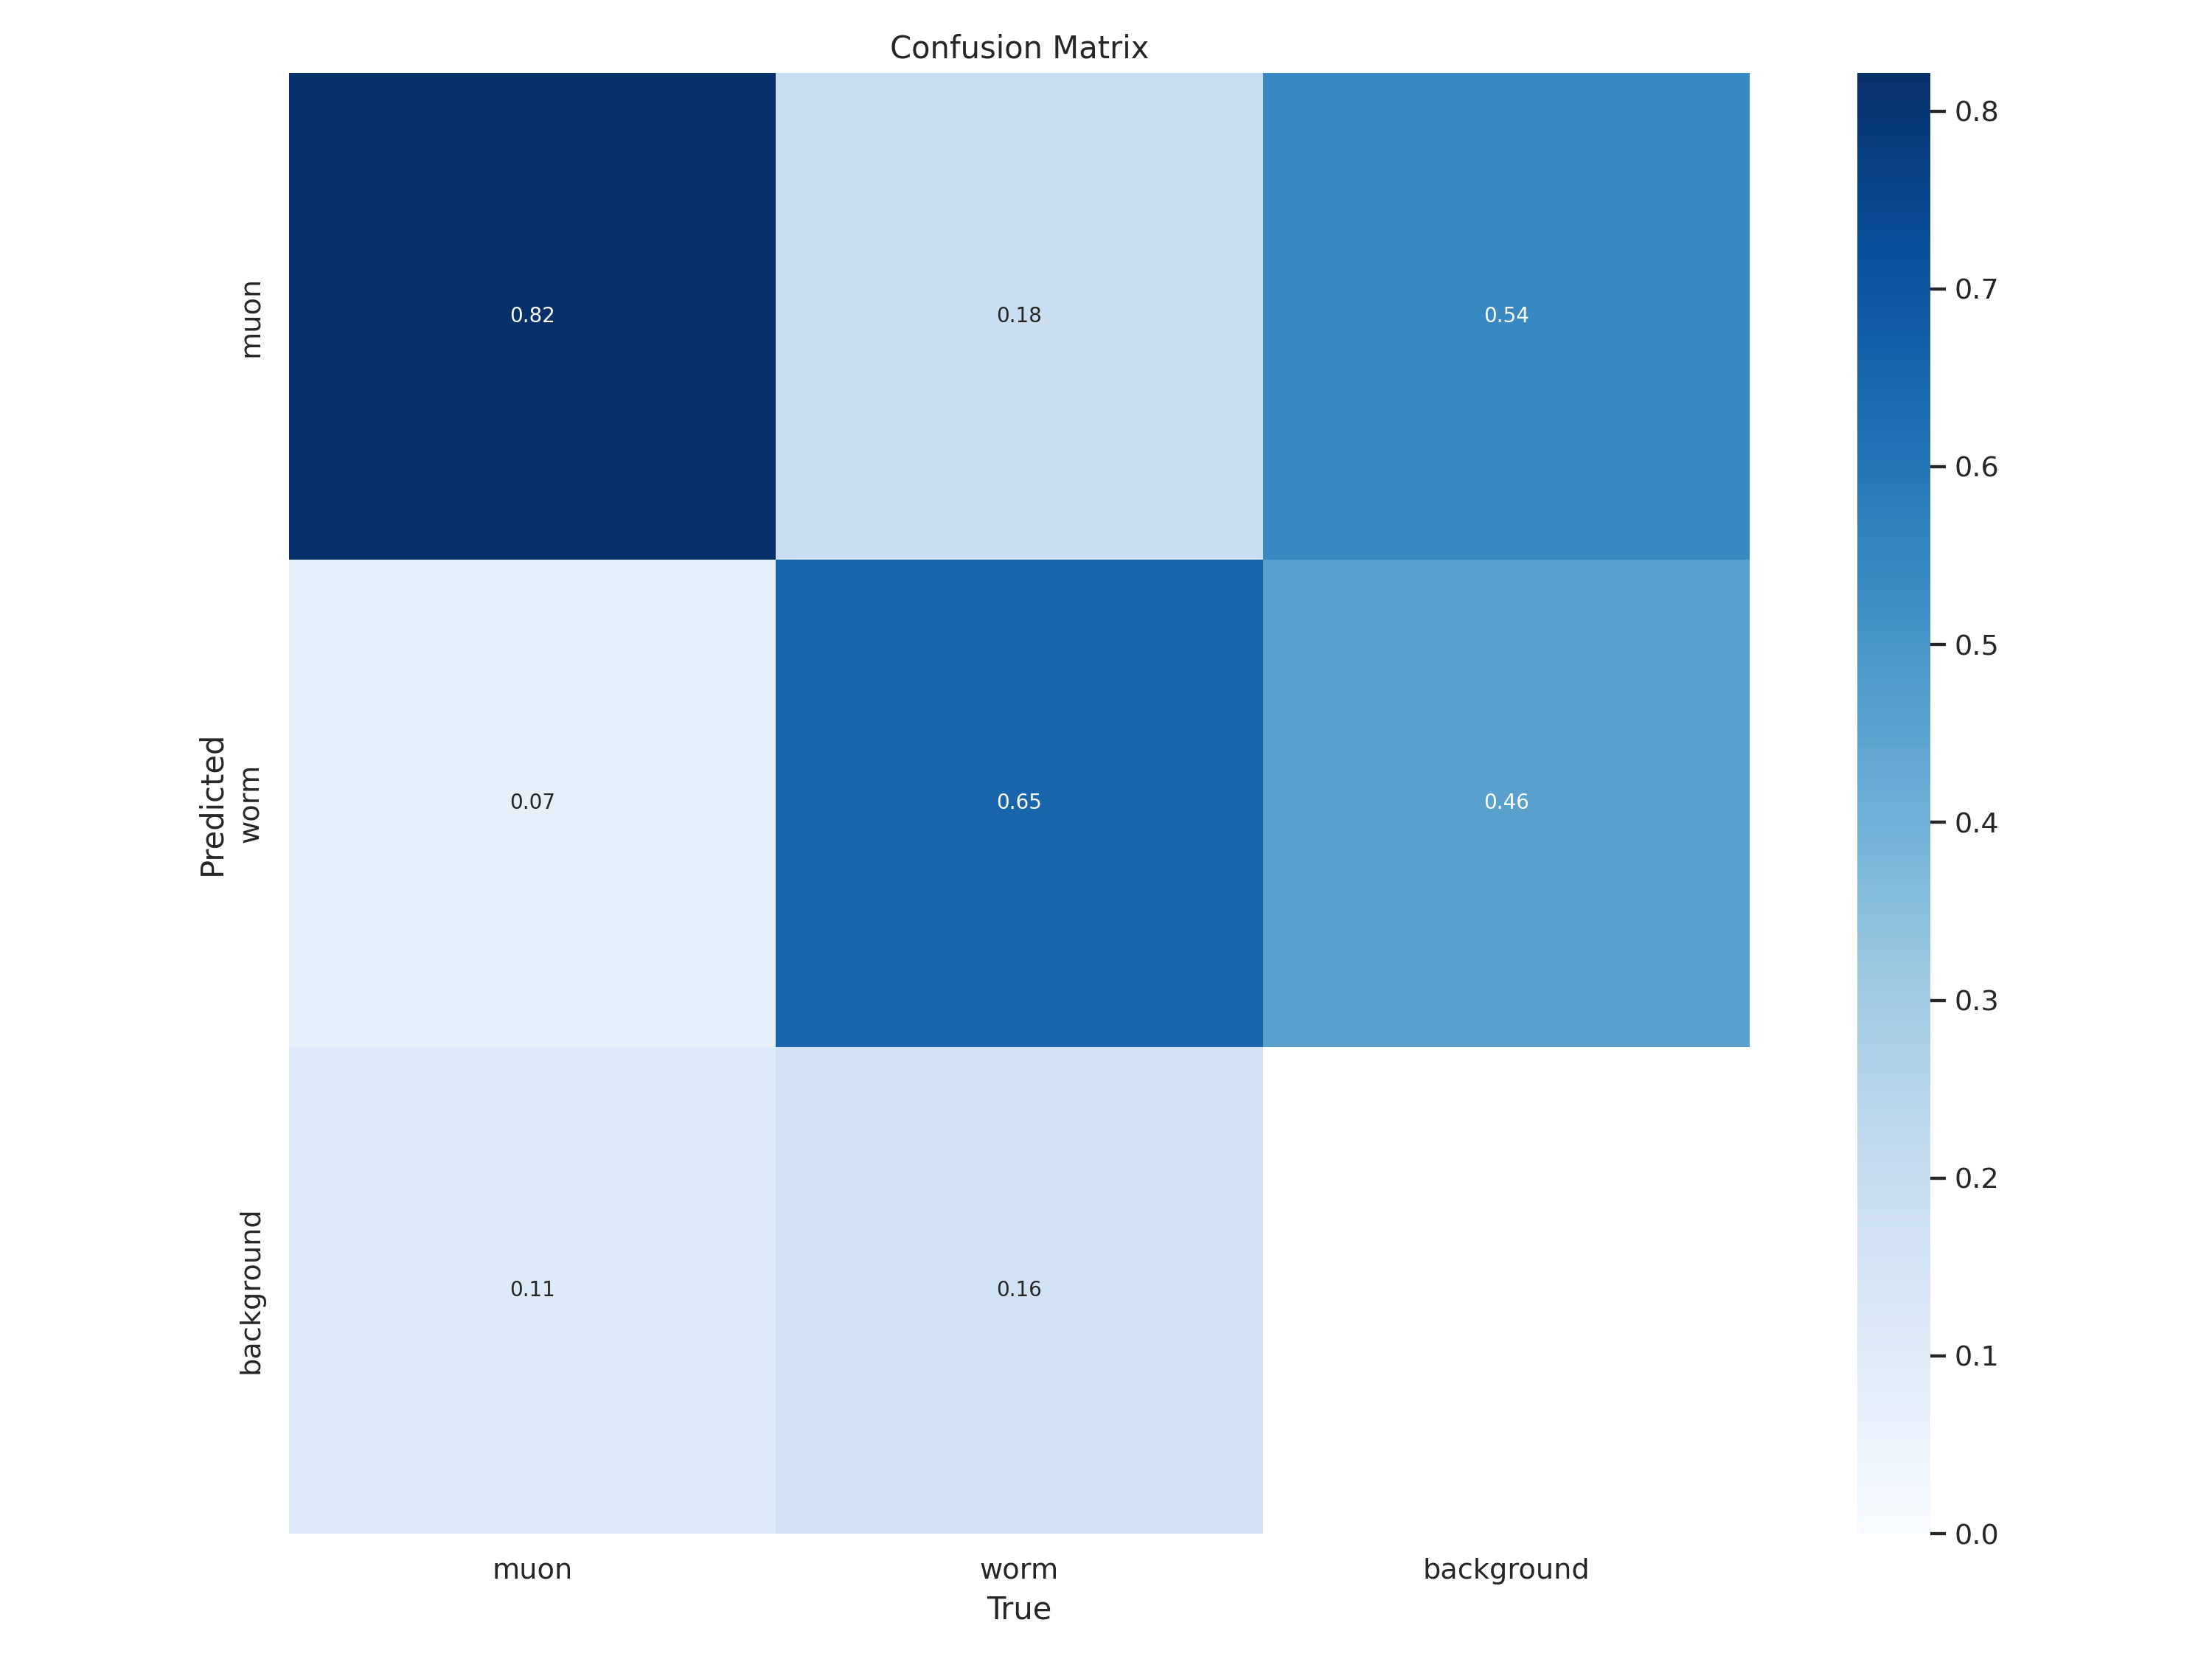

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8l/confusion_matrix.png', width=700)

/content


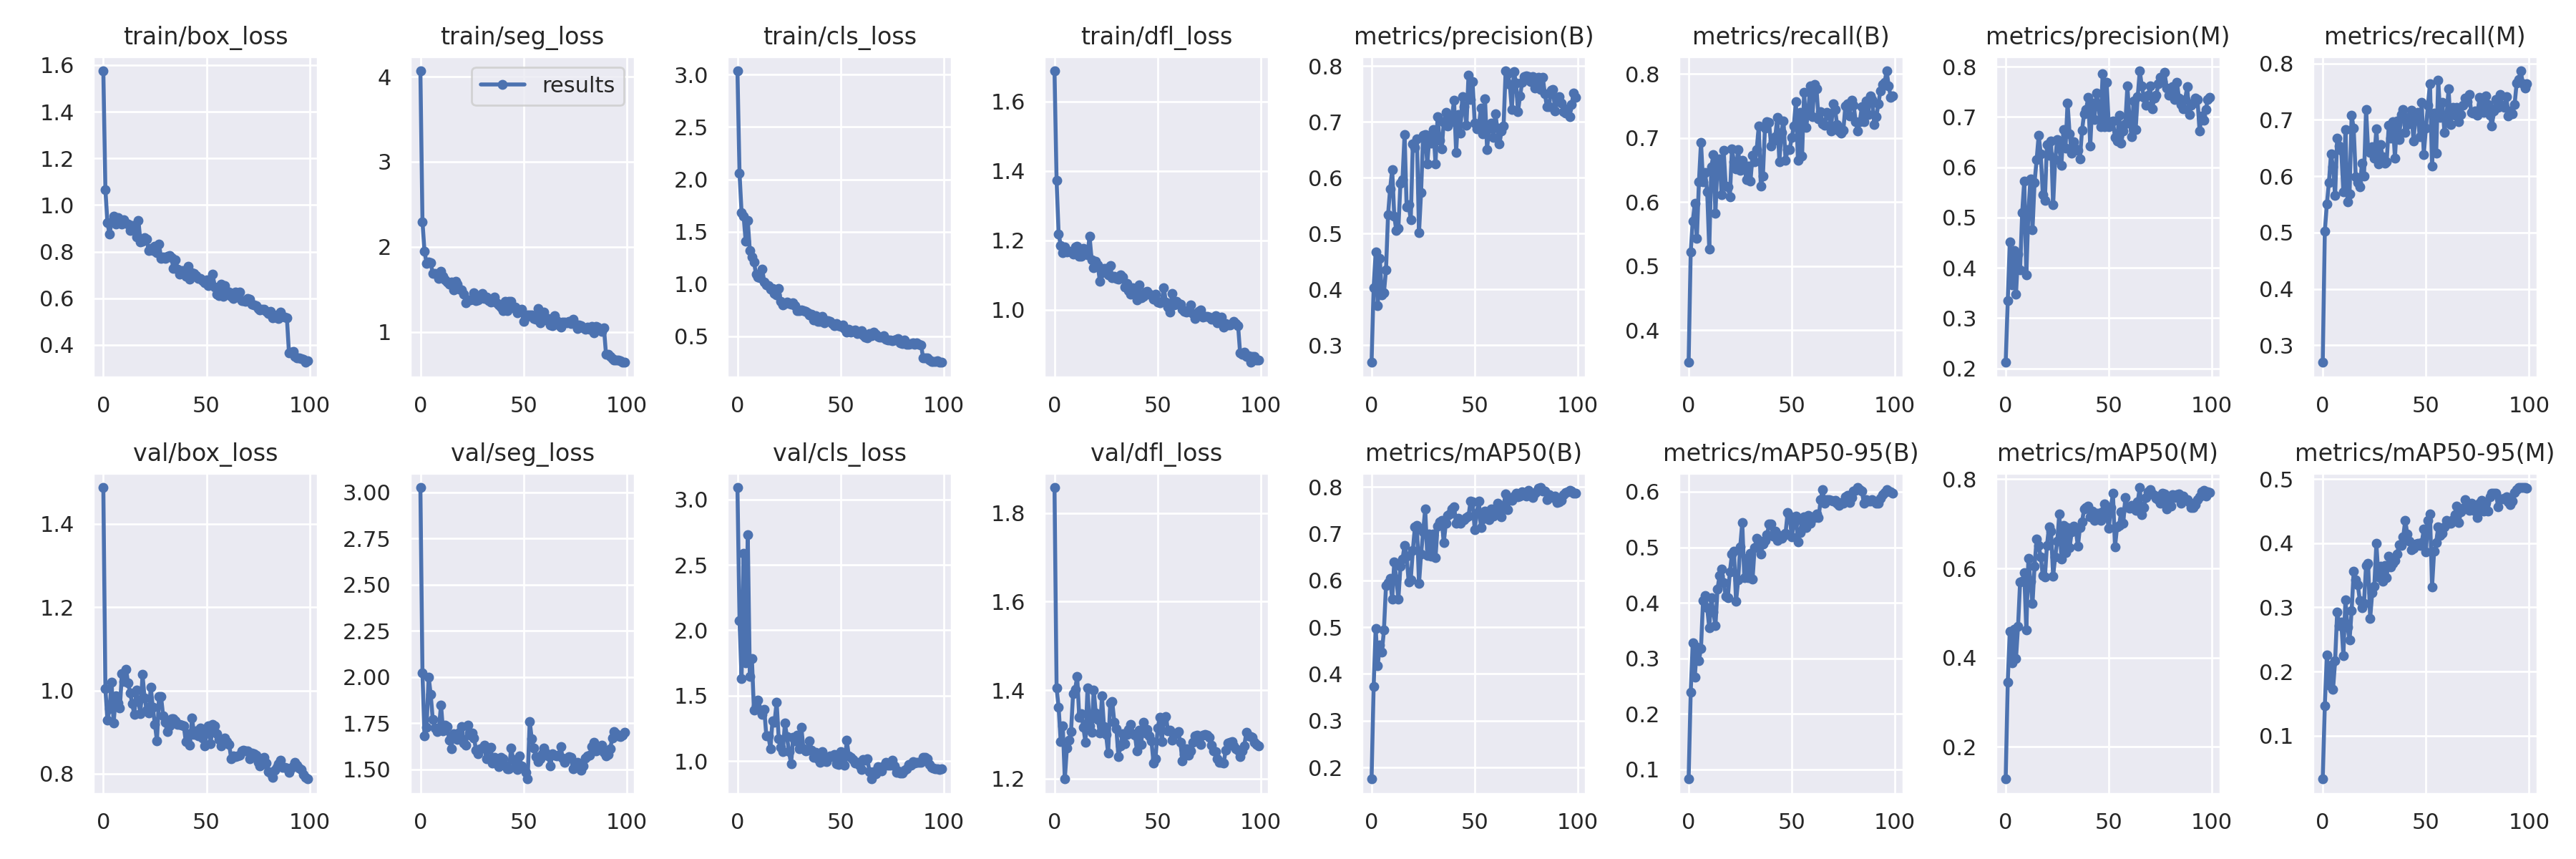

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8l/results.png', width=600)

/content


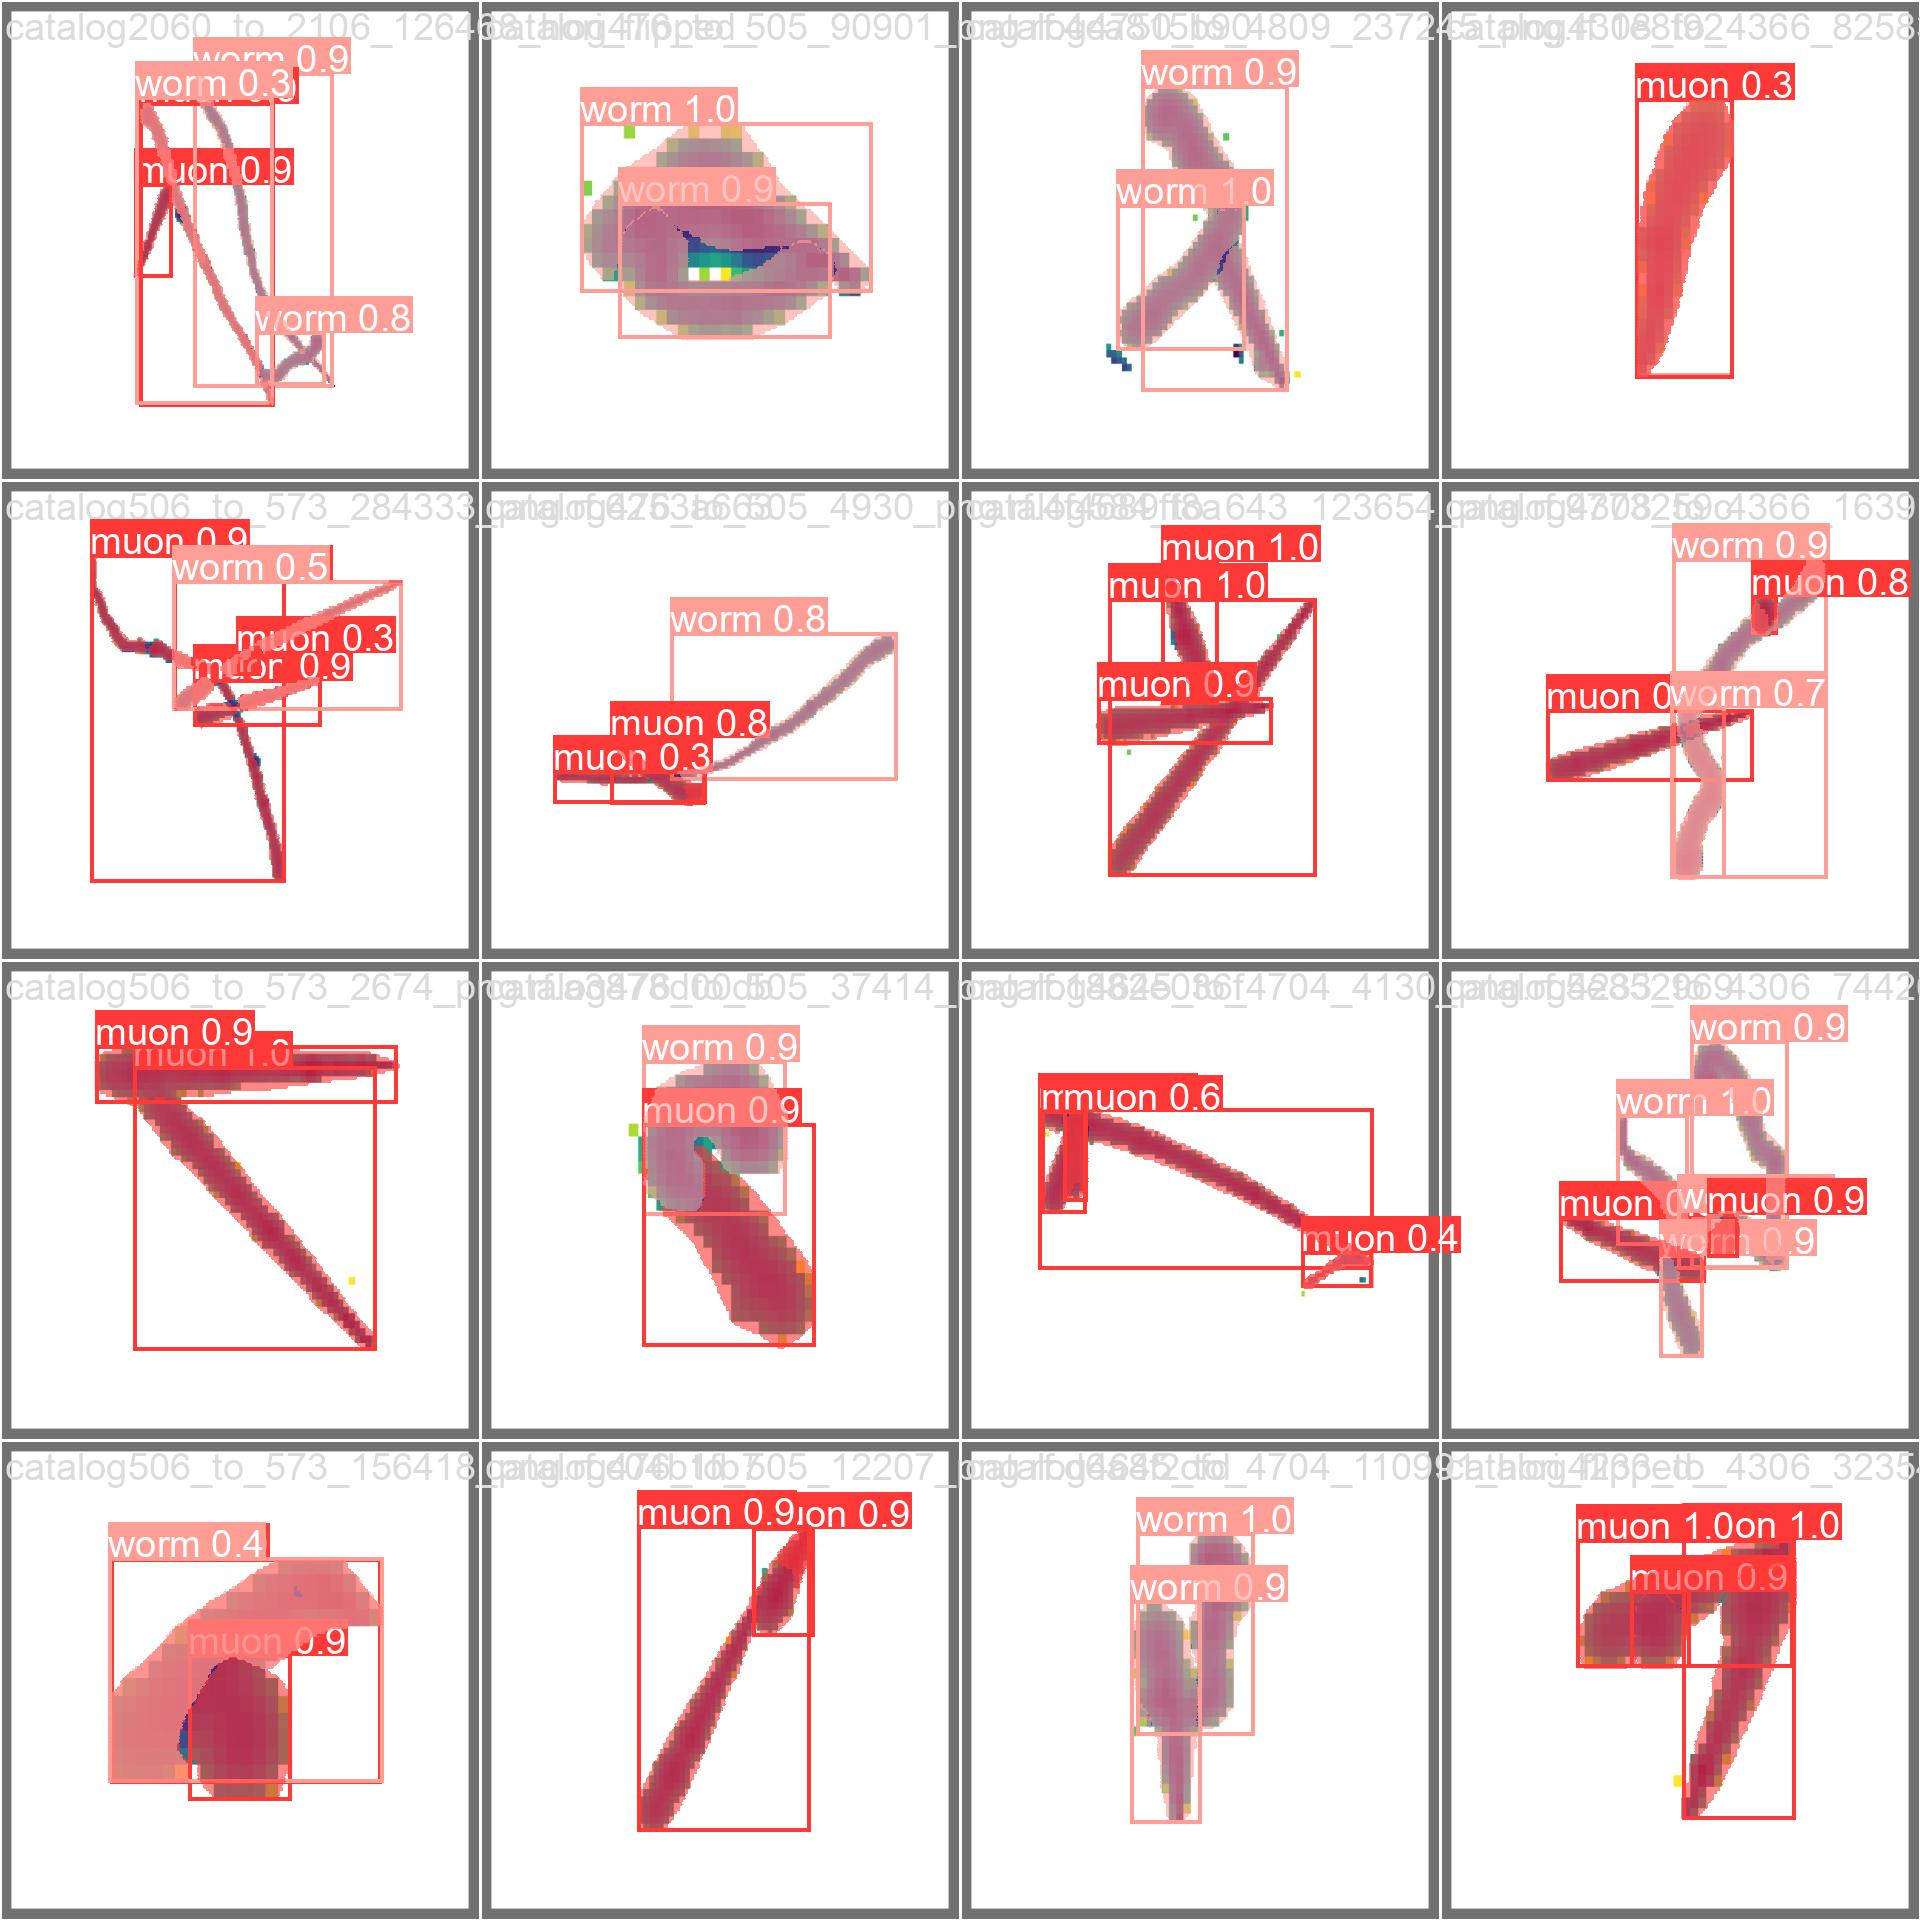

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8l/val_batch0_pred.jpg', width=600)

## Validate Model YOLOv8l-SEG

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/epoch100_yolov8l/weights/best.pt data={dataset.location}/data.yaml name='val_yolov8l'

/content
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45913430 parameters, 0 gradients, 220.1 GFLOPs
val: Scanning /content/datasets/MuonDataset-1/valid/labels.cache... 88 images, 0 backgrounds, 0 corrupt: 100% 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:09<00:00,  1.66s/it]
                   all         88        232       0.71      0.805      0.792      0.604      0.691      0.784      0.766      0.484
                  muon         88        140      0.721      0.849      0.862      0.717      0.703      0.828      0.829      0.564
                  worm         88         92      0.699      0.761      0.723      0.492      0.679      0.739      0.702      0.404
Speed: 6.1ms preprocess, 42.4ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/segment/val

##Predict Model YOLOv8l-SEG

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/epoch100_yolov8l/weights/best.pt conf=0.25 source={dataset.location}/test/images name='test_yolov8l' save=True

/content
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45913430 parameters, 0 gradients, 220.1 GFLOPs

image 1/43 /content/datasets/MuonDataset-1/test/images/catalog2060_to_2106_143603_png.rf.1e8e0b927baaeaef7c2b5613dbc09f3f.jpg: 640x640 1 muon, 1 worm, 75.2ms
image 2/43 /content/datasets/MuonDataset-1/test/images/catalog2060_to_2106_175983_png.rf.066cb43c40bd7f1a3ff37b7788e5c6f0.jpg: 640x640 2 muons, 1 worm, 44.4ms
image 3/43 /content/datasets/MuonDataset-1/test/images/catalog2110_to_2171_157446_png.rf.91b56c3390422913c596e9a8f0480ce8.jpg: 640x640 3 muons, 1 worm, 44.3ms
image 4/43 /content/datasets/MuonDataset-1/test/images/catalog2110_to_2171_158279_png.rf.a36d137dcc14e93f4b992f5405511ea4.jpg: 640x640 4 muons, 44.5ms
image 5/43 /content/datasets/MuonDataset-1/test/images/catalog2304_to_2353_110927_png.rf.3645e63f71abff1e142be208835621ba.jpg: 640x640 2 muons, 41.5ms
image 6/43 /content/datasets/MuonData

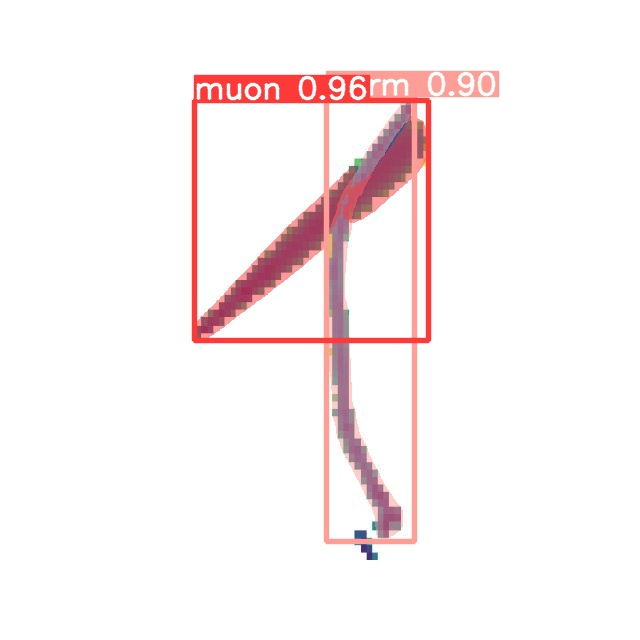

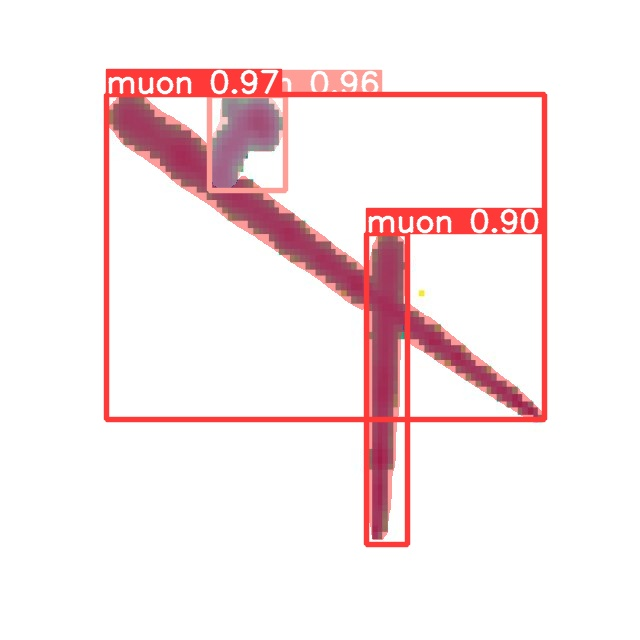

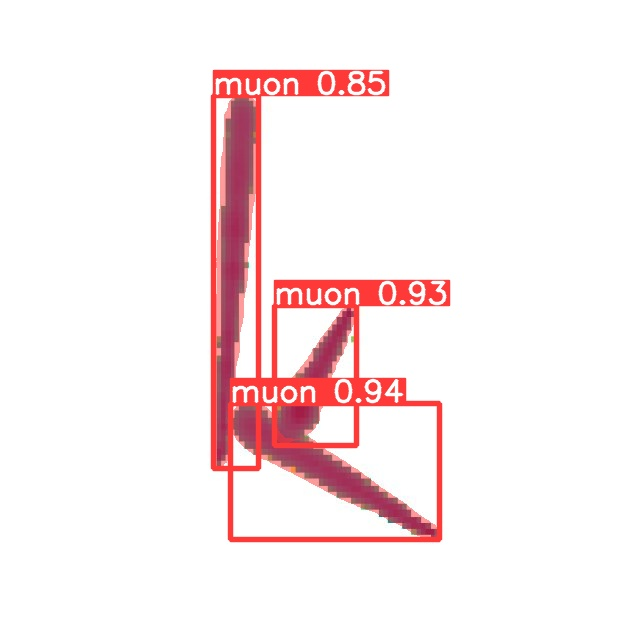

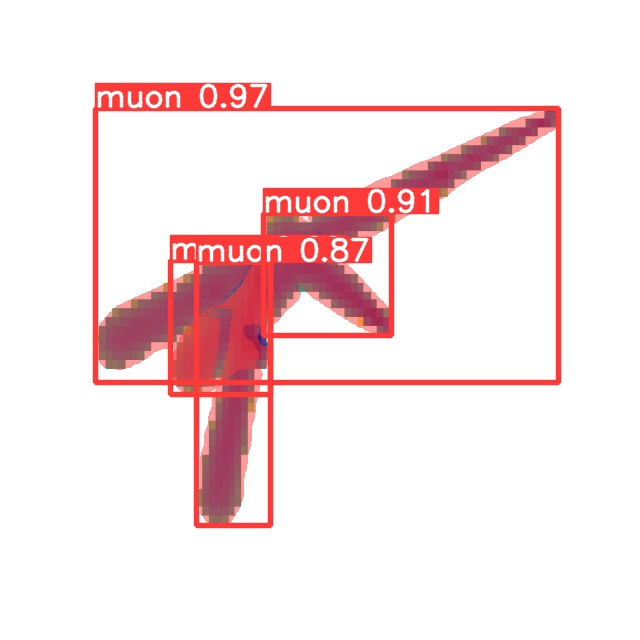

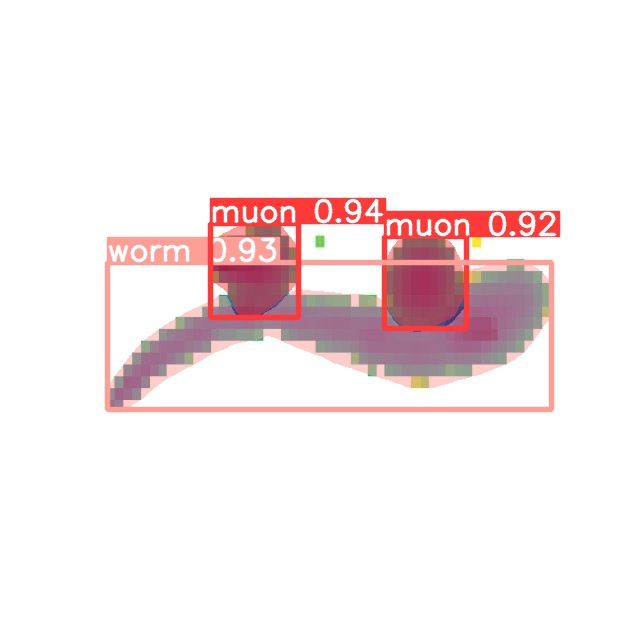

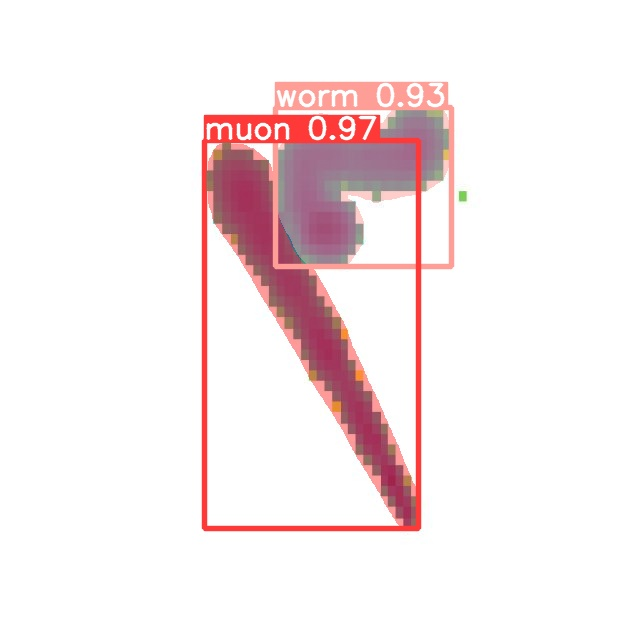

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/test_yolov8l/*.jpg')[:6]:
      display(Image(filename=image_path, height=200))
      print("\n")

## Model YOLOv8X-SEG

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8x-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 name='epoch100_yolov8x'

/content
100% 137M/137M [00:01<00:00, 88.3MB/s]
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/datasets/MuonDataset-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=epoch100_yolov8x, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

/content


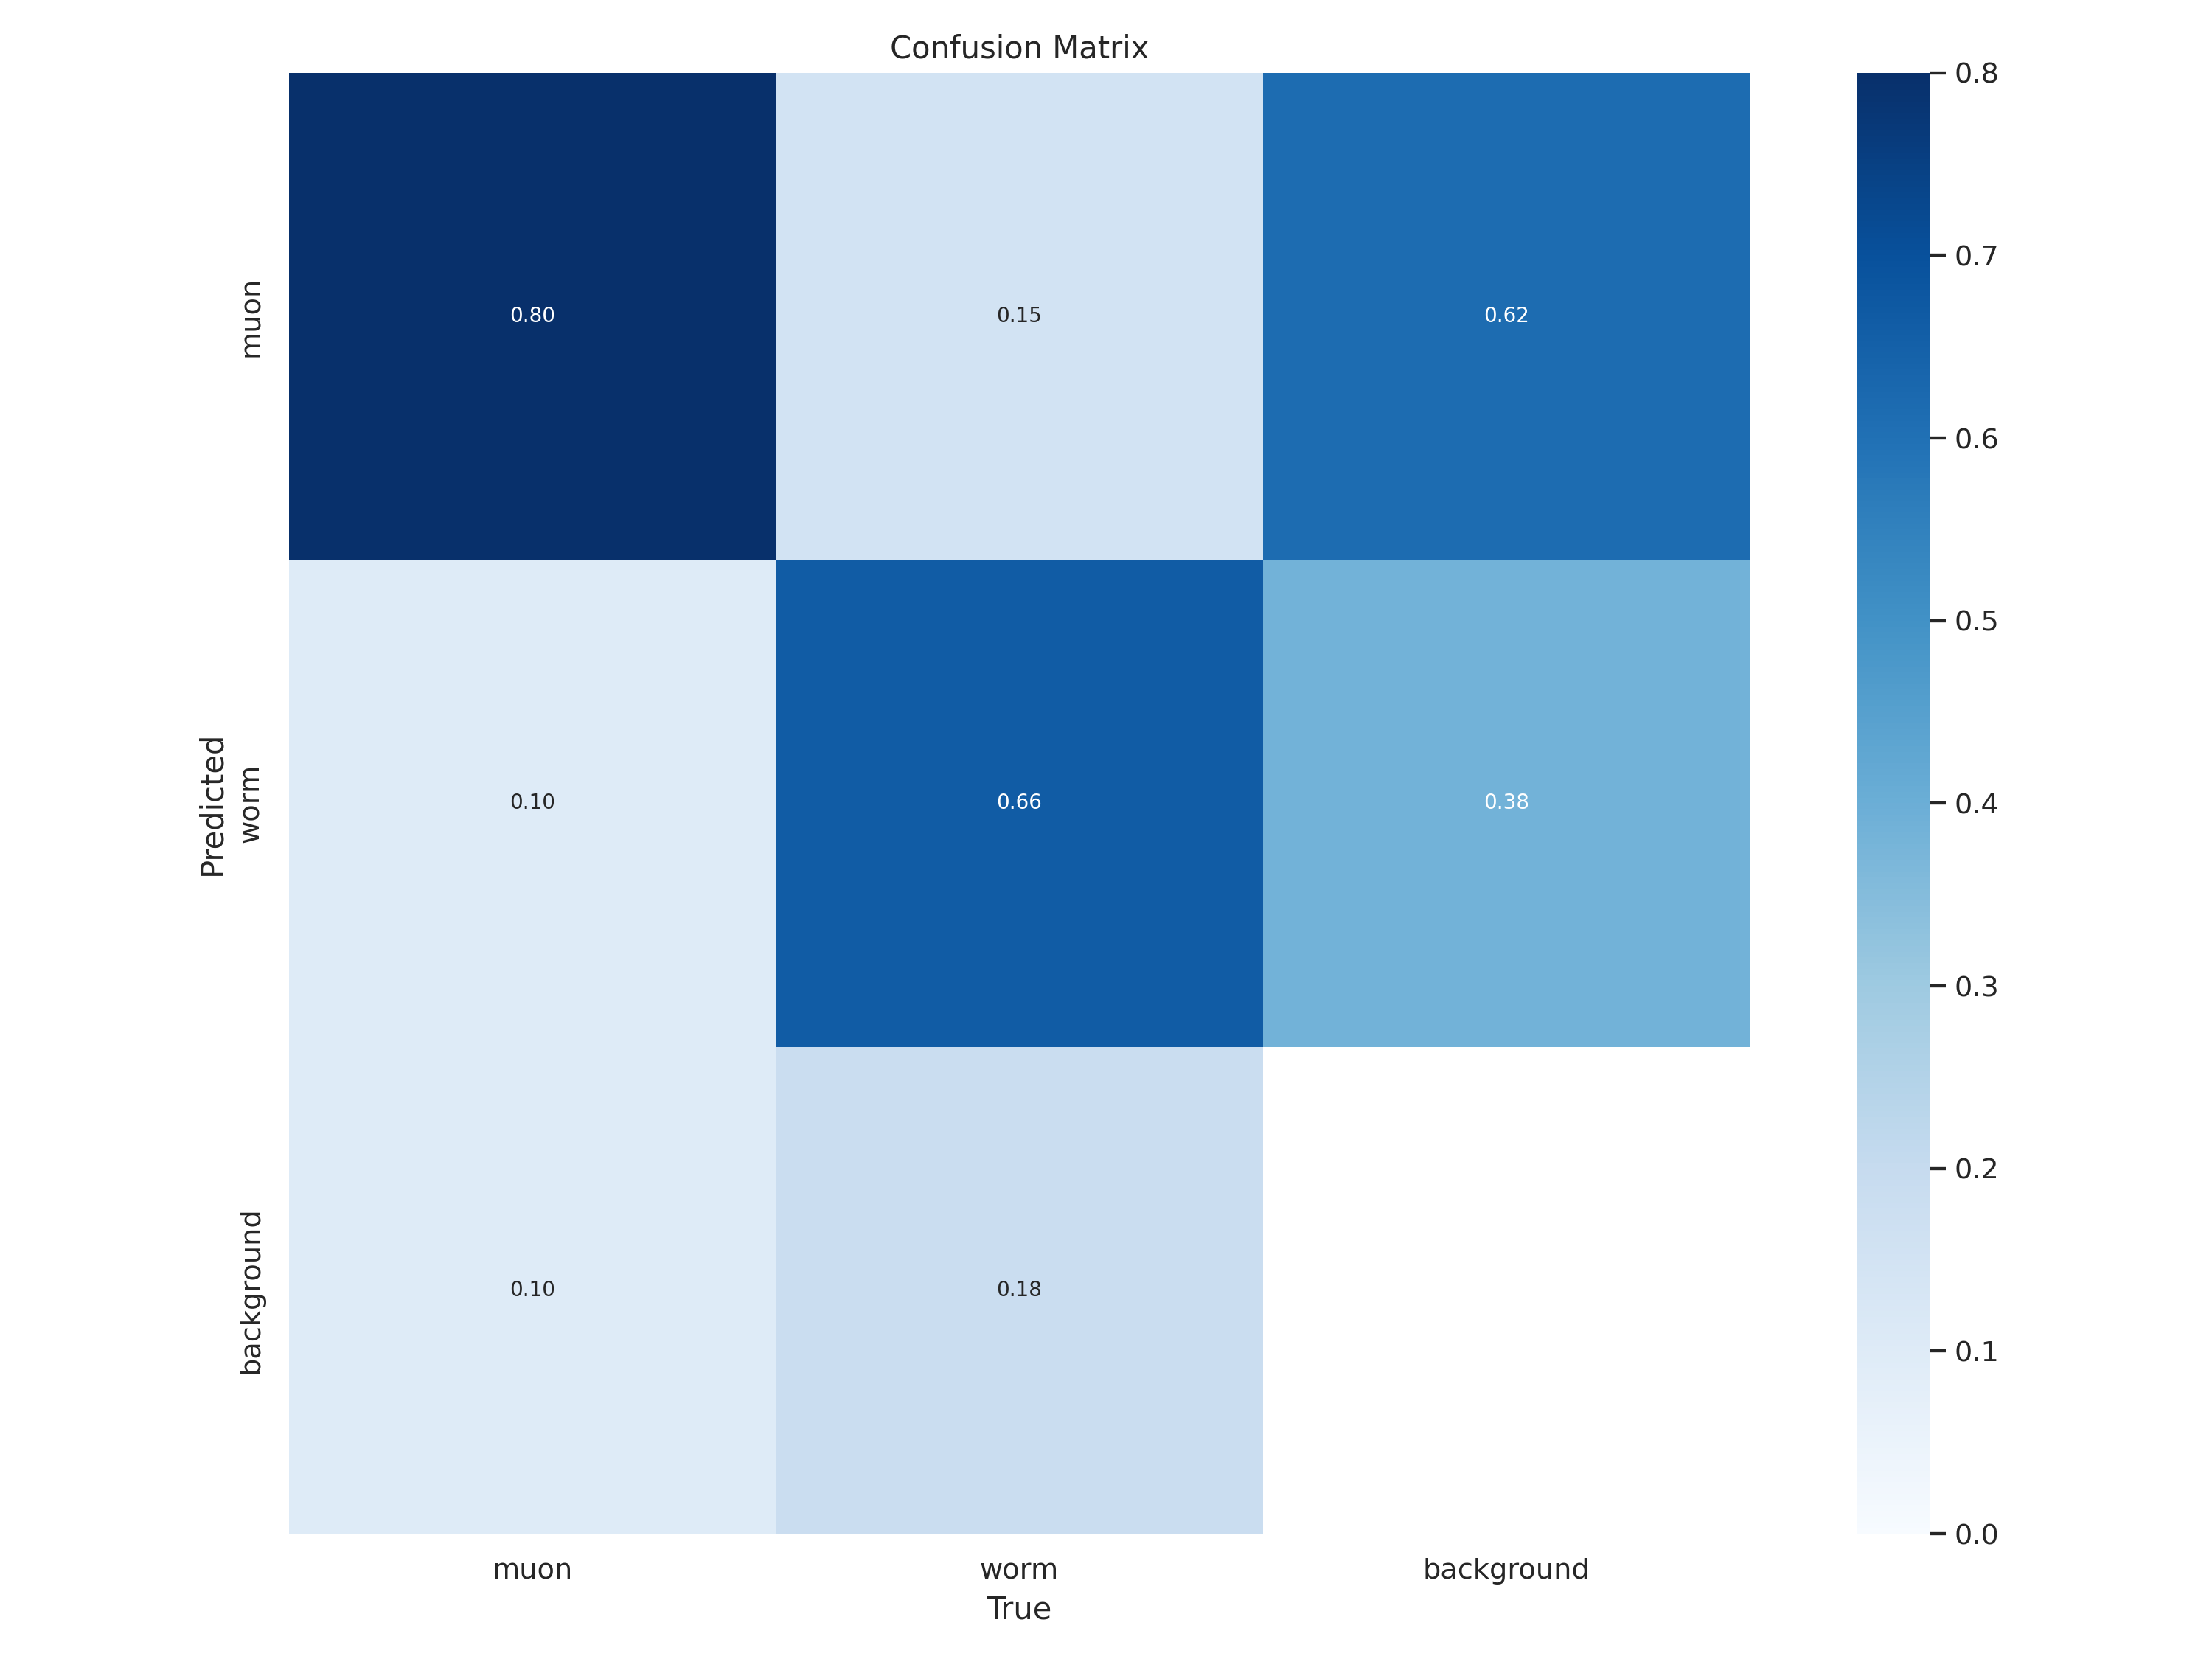

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8x/confusion_matrix.png', width=700)


/content


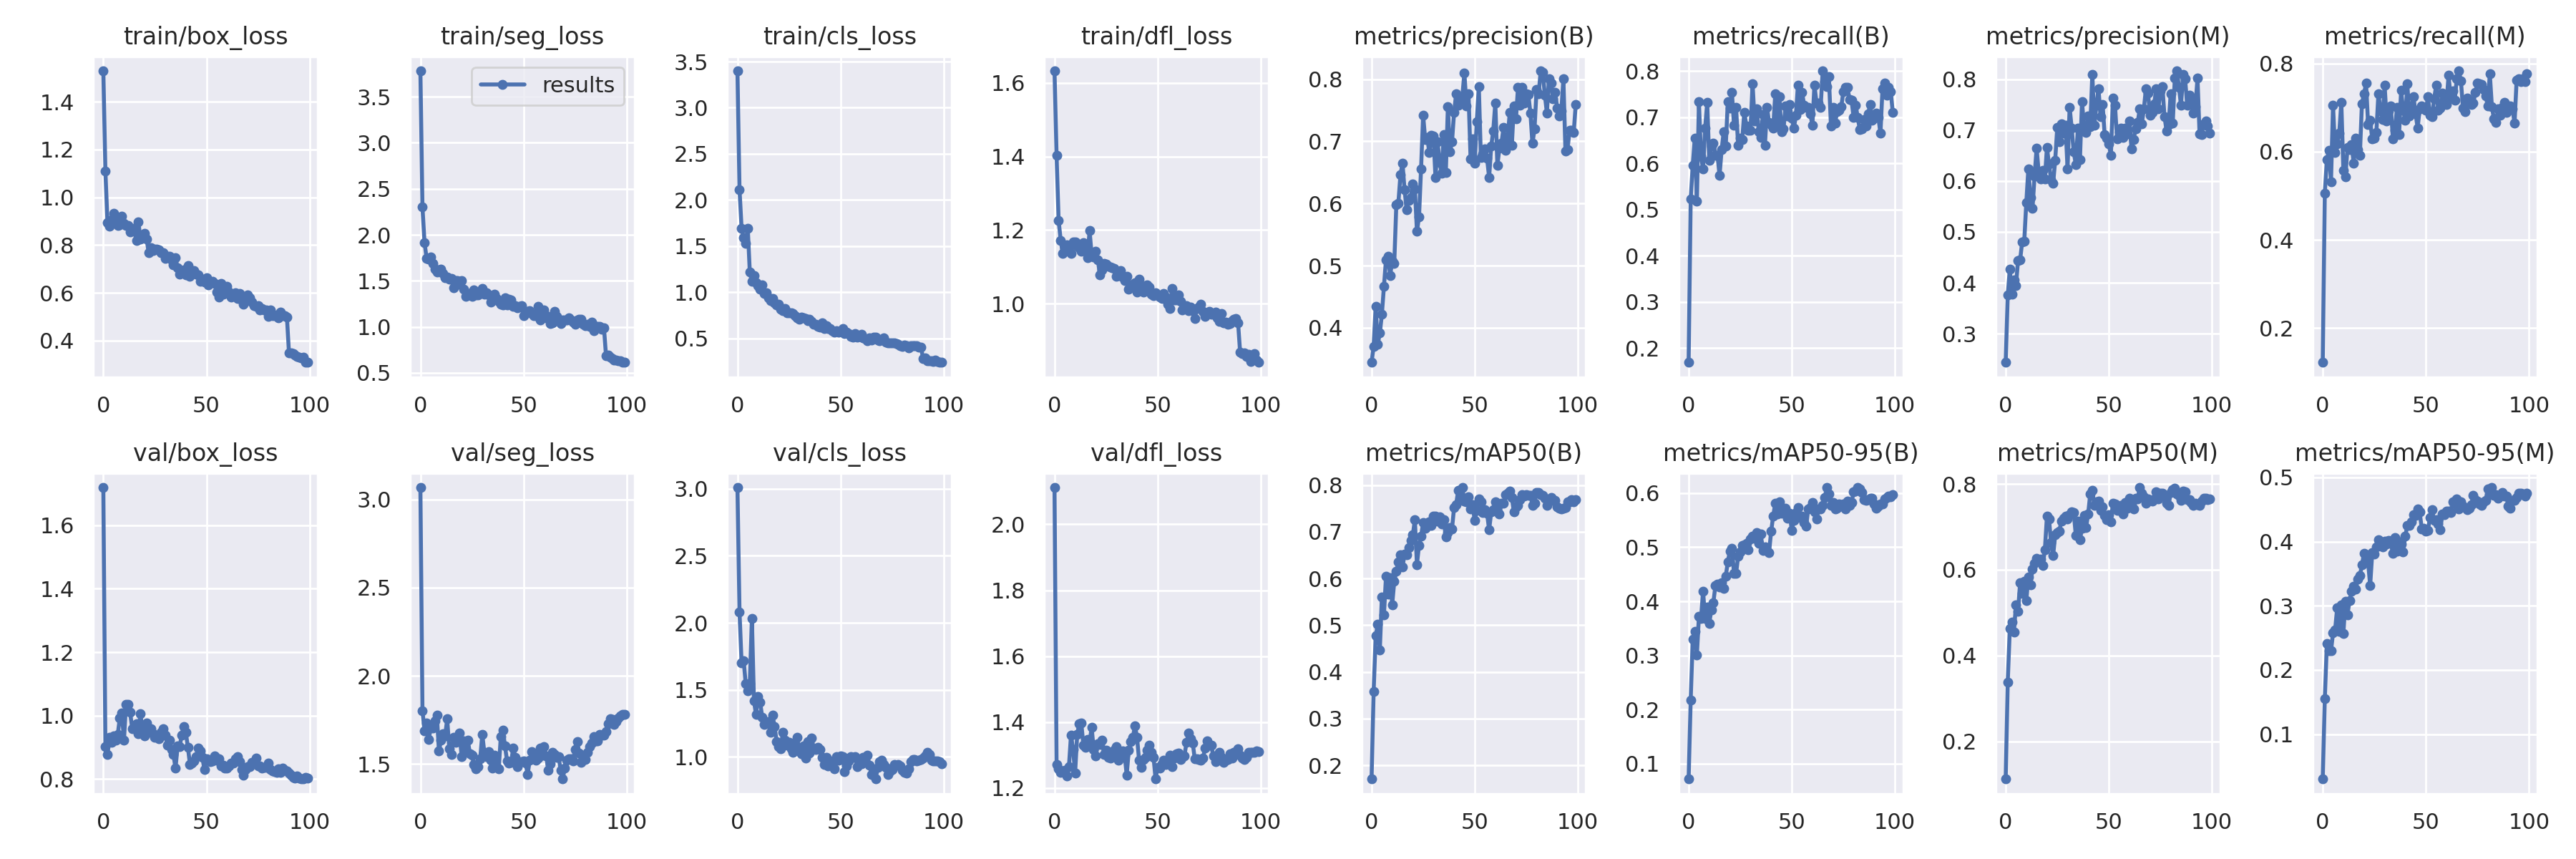

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8x/results.png', width=600)

/content


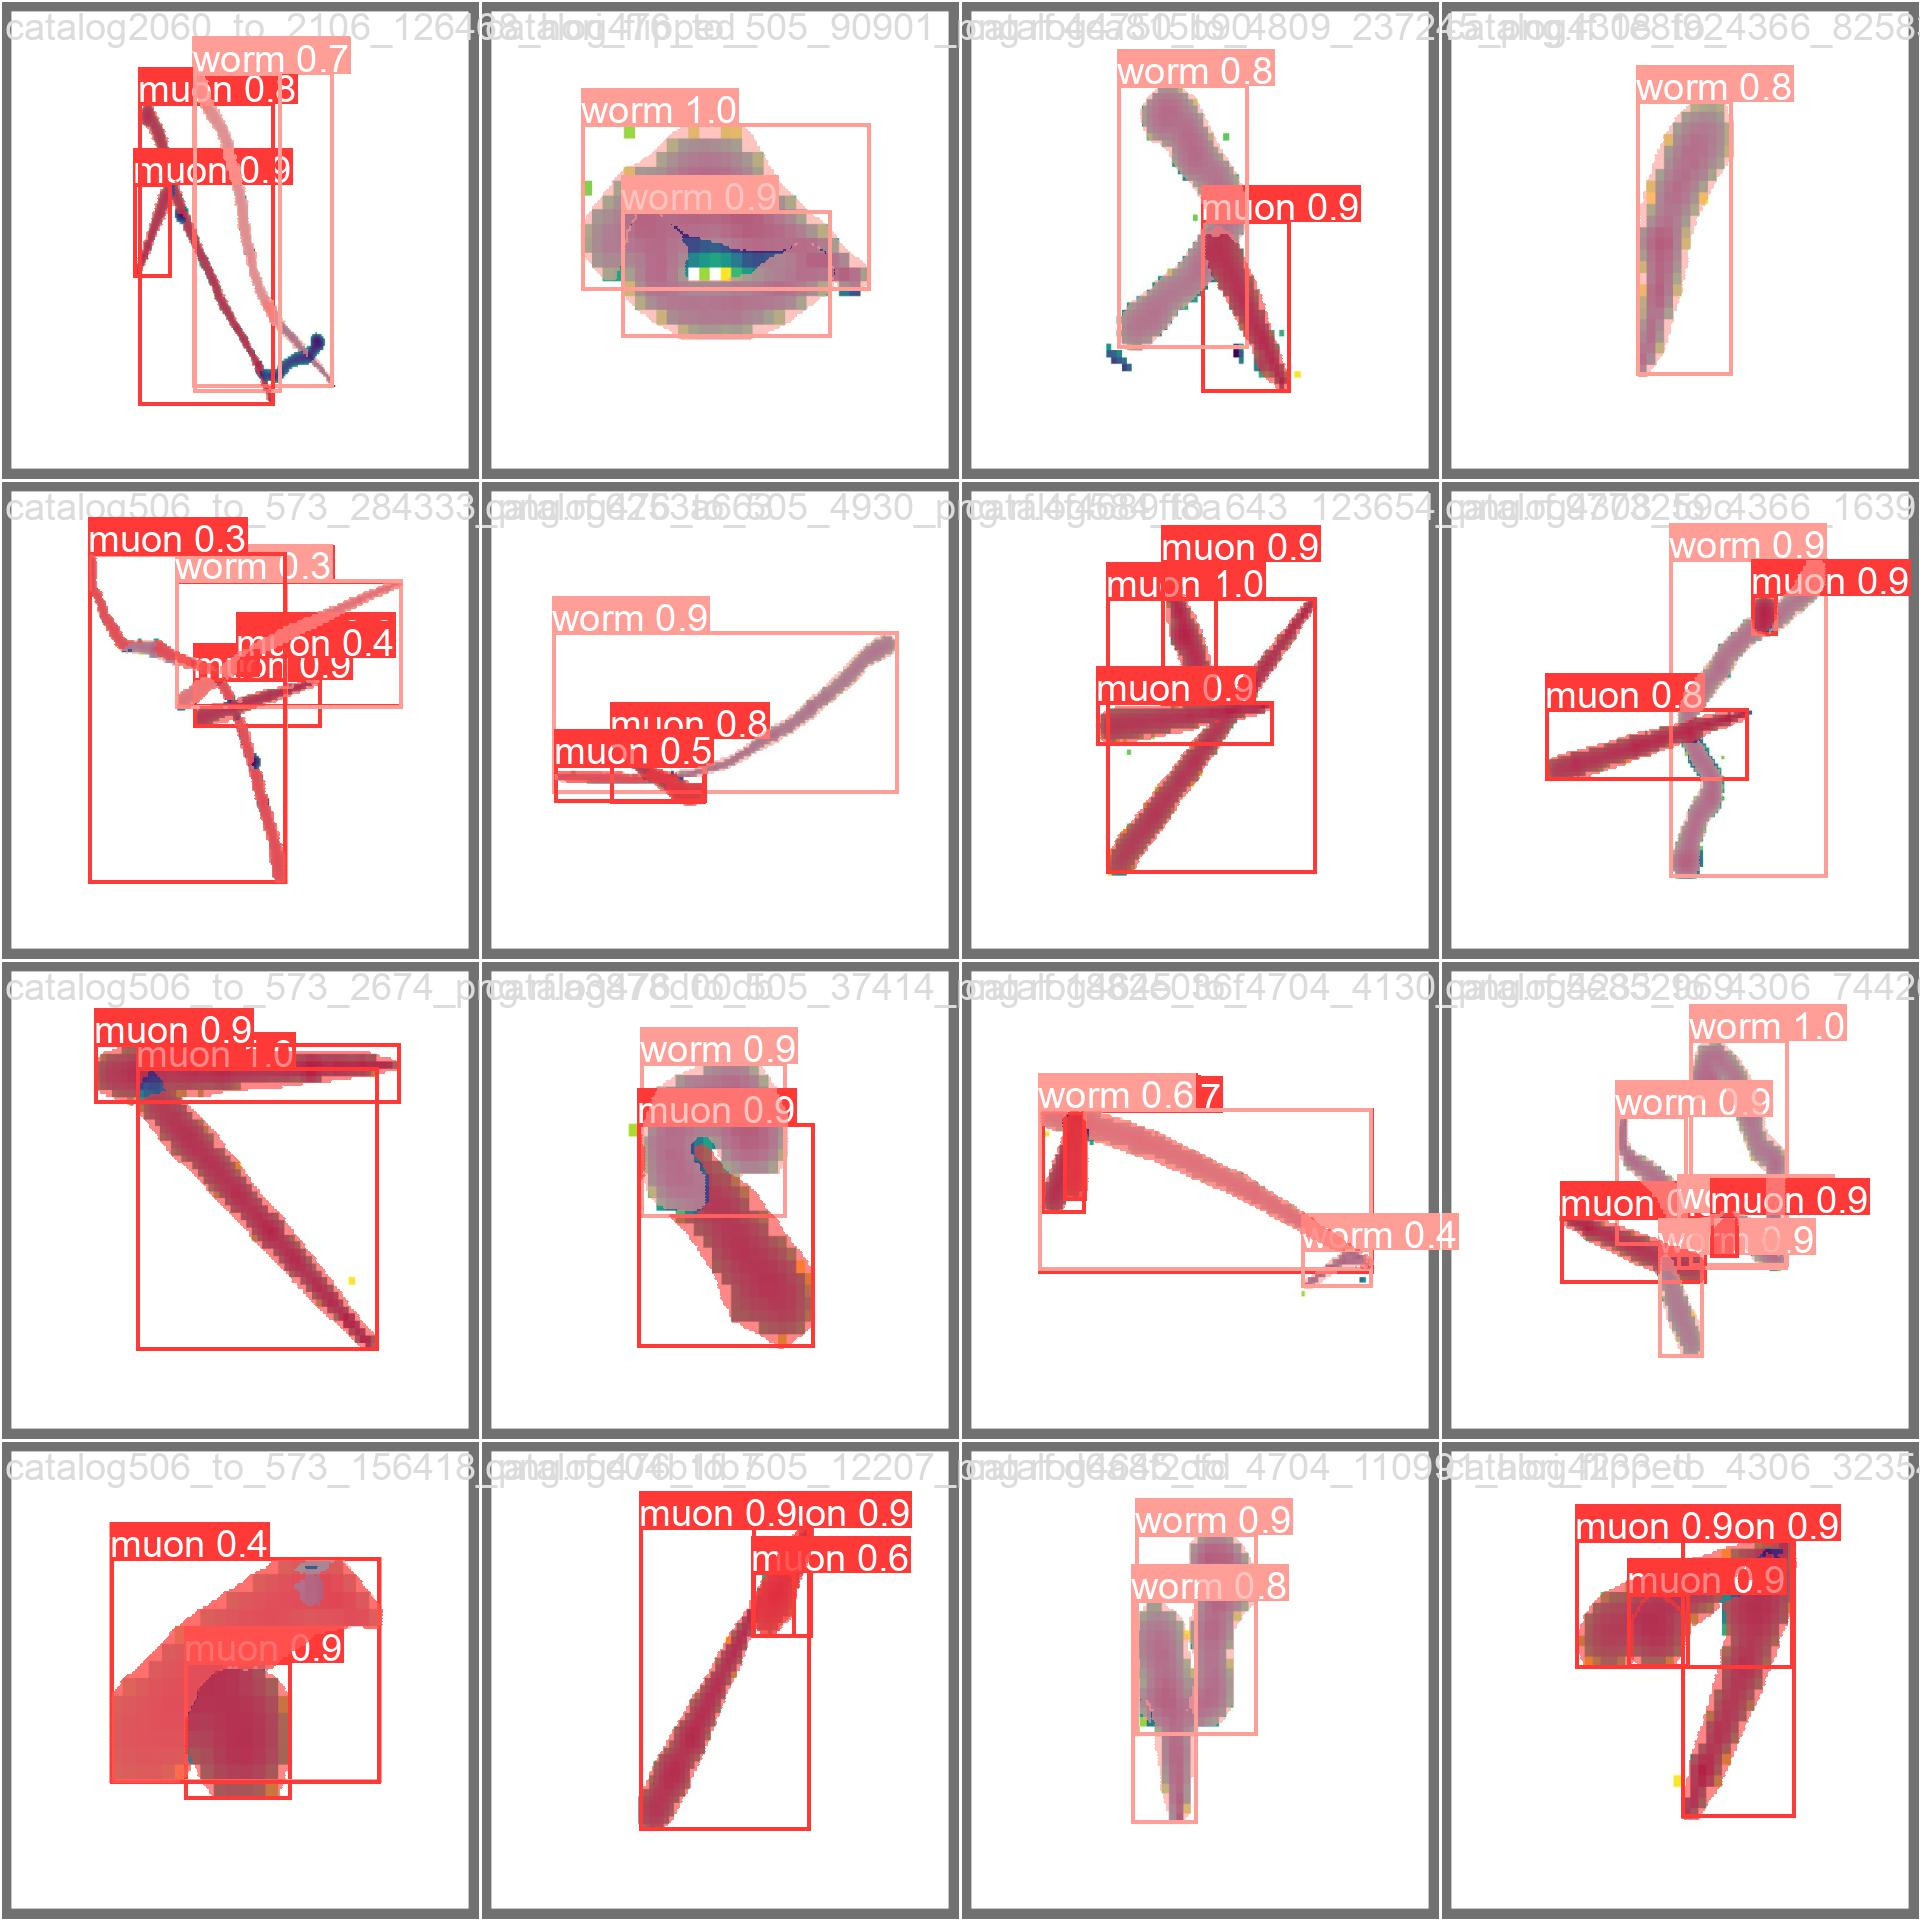

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/epoch100_yolov8x/val_batch0_pred.jpg', width=600)

## Validate YOLOv8X-SEG

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/epoch100_yolov8x/weights/best.pt data={dataset.location}/data.yaml name='val_yolov8x'

/content
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs
val: Scanning /content/datasets/MuonDataset-1/valid/labels.cache... 88 images, 0 backgrounds, 0 corrupt: 100% 88/88 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:12<00:00,  2.08s/it]
                   all         88        232      0.813      0.699       0.78      0.611      0.802      0.703      0.791      0.485
                  muon         88        140      0.853      0.789      0.861      0.714      0.841      0.786      0.859      0.569
                  worm         88         92      0.773      0.609      0.699      0.508      0.764       0.62      0.723      0.401
Speed: 6.7ms preprocess, 72.9ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/segment/val

## Predict YOLOv8X-SEG

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/epoch100_yolov8x/weights/best.pt conf=0.25 source={dataset.location}/test/images name='test_yolov8x' save=True

/content
Ultralytics YOLOv8.0.53 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71722582 parameters, 0 gradients, 343.7 GFLOPs

image 1/43 /content/datasets/MuonDataset-1/test/images/catalog2060_to_2106_143603_png.rf.1e8e0b927baaeaef7c2b5613dbc09f3f.jpg: 640x640 1 muon, 1 worm, 109.9ms
image 2/43 /content/datasets/MuonDataset-1/test/images/catalog2060_to_2106_175983_png.rf.066cb43c40bd7f1a3ff37b7788e5c6f0.jpg: 640x640 2 muons, 1 worm, 66.8ms
image 3/43 /content/datasets/MuonDataset-1/test/images/catalog2110_to_2171_157446_png.rf.91b56c3390422913c596e9a8f0480ce8.jpg: 640x640 3 muons, 1 worm, 72.5ms
image 4/43 /content/datasets/MuonDataset-1/test/images/catalog2110_to_2171_158279_png.rf.a36d137dcc14e93f4b992f5405511ea4.jpg: 640x640 4 muons, 72.3ms
image 5/43 /content/datasets/MuonDataset-1/test/images/catalog2304_to_2353_110927_png.rf.3645e63f71abff1e142be208835621ba.jpg: 640x640 2 muons, 71.6ms
image 6/43 /content/datasets/MuonDat

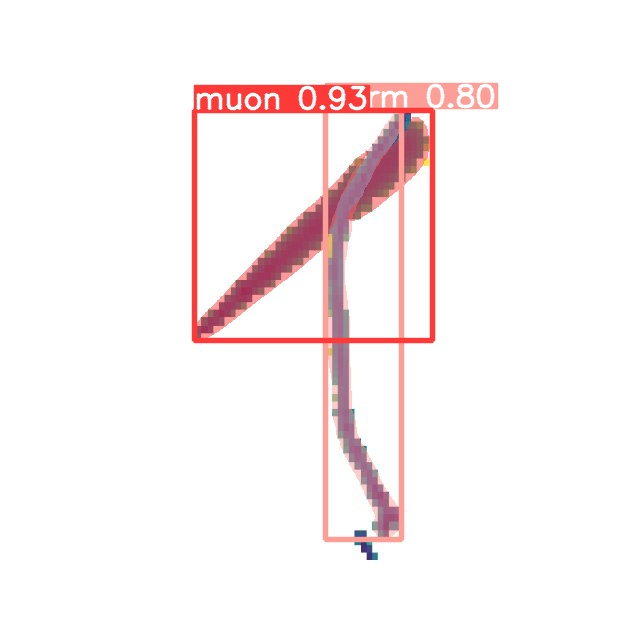

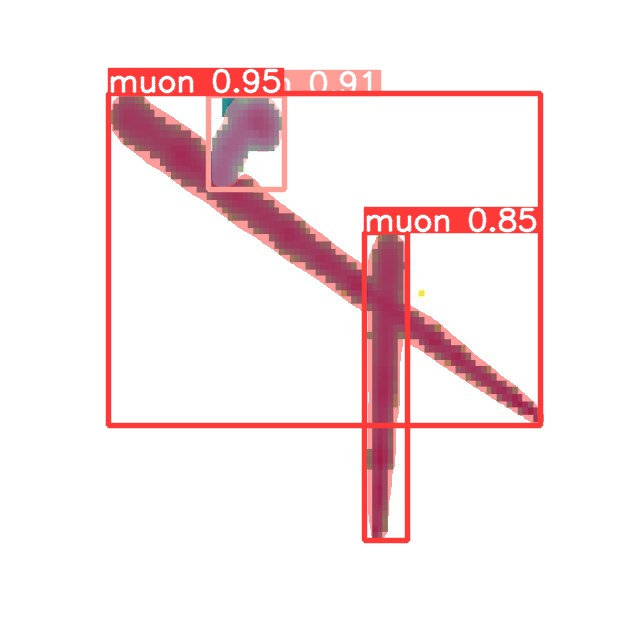

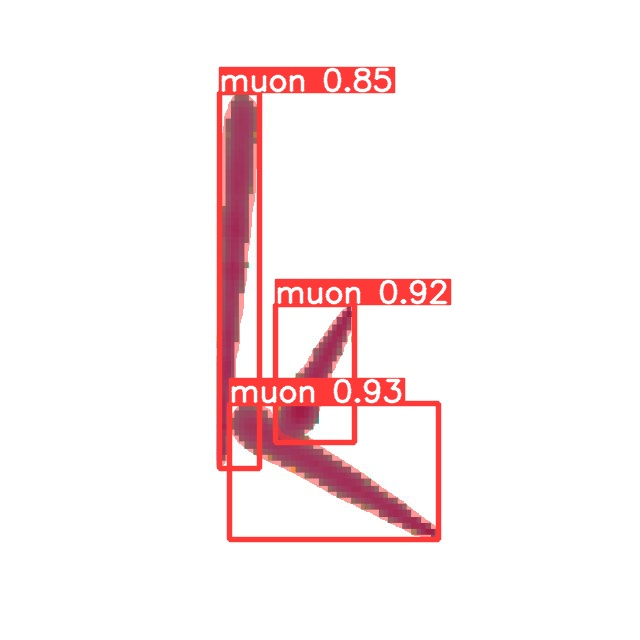

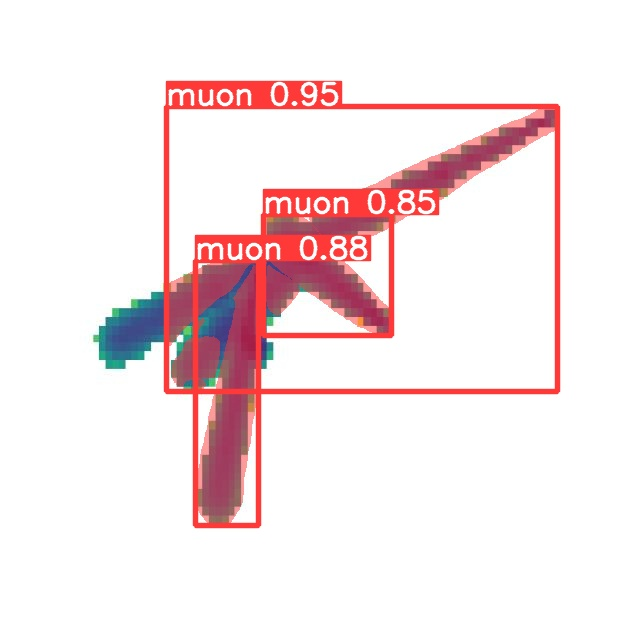

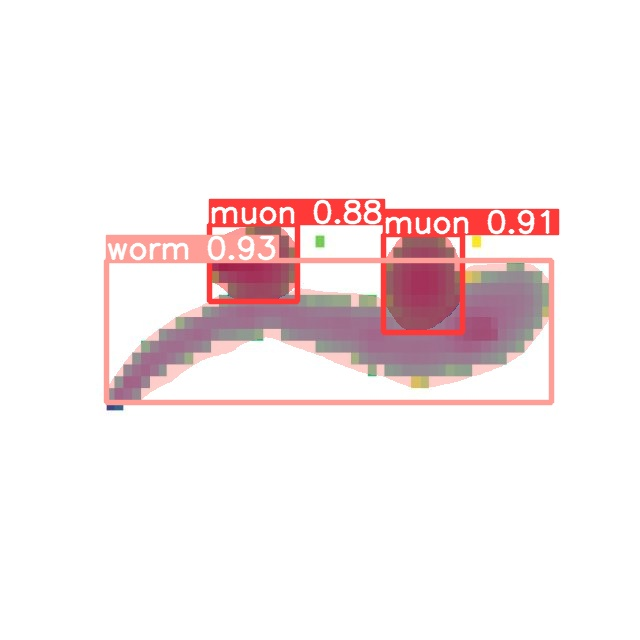

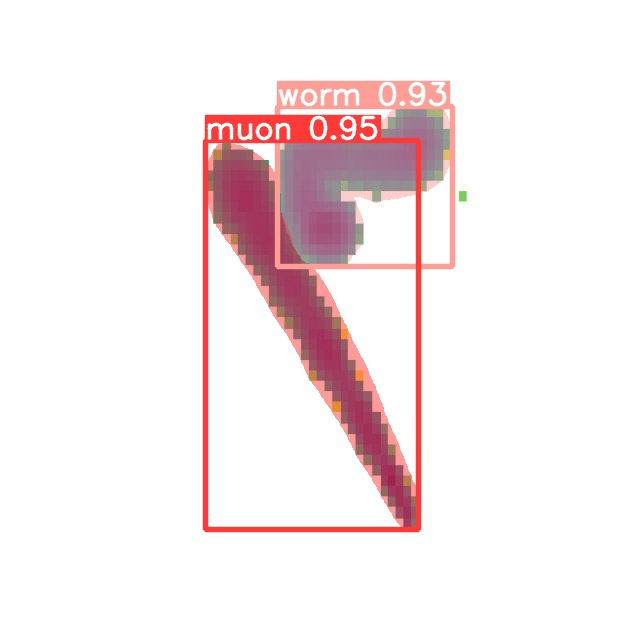

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/test_yolov8x/*.jpg')[:6]:
      display(Image(filename=image_path, height=200))
      print("\n")

In [ ]:
!zip -r /content.zip /content

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2023.03.09/ (stored 0%)
  adding: content/.config/logs/2023.03.09/18.57.42.956897.log (deflated 58%)
  adding: content/.config/logs/2023.03.09/18.58.07.603569.log (deflated 57%)
  adding: content/.config/logs/2023.03.09/18.57.34.727219.log (deflated 86%)
  adding: content/.config/logs/2023.03.09/18.58.08.382774.log (deflated 56%)
  adding: content/.config/logs/2023.03.09/18.57.10.794840.log (deflated 58%)
  adding: content/.config/logs/2023.03.09/18.56.44.754561.log (deflated 91%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/.last_u